# PREPARACIÓN Y LIMPIEZA DE DATOS

In [2]:
# CÓDIGO PARA COMPROBAR Y CAMBIAR EL DIRECTORIO DE TRABAJO
# (DEFINIDO DIRECTORIO DE TRABAJO DONDE ESTÁ GUARDADO EL PRESENTE SCRIPT) 

import os
# Current working directory:
cwd = os.getcwd()
#print('Current working directory: ', cwd)
# Change working directory:
#os.chdir('C:\Users\FAL\Desktop\TFM_MEDS21\Code')
#cwd = os.getcwd()
print('Current working directory: ', cwd)


Current working directory:  C:\Users\FAL\Desktop\TFM_MEDS21\Code


In [3]:
#!pip install statsmodels

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_profiling
import miceforest as mf
import statsmodels.api as sm

import sklearn
import matplotlib
import scipy
import statsmodels
import mlxtend
import category_encoders
import seaborn
import xgboost

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as ma
import matplotlib.font_manager as fm

In [6]:
%matplotlib inline

## 1. PREPARACIÓN DE DATOS

### 1.1. Datos demanda eléctrica (REE ESIOS-master)

In [7]:
# CARGA DATOS

data_in1a = '../Data_in/1.1_REE ESIOS-master/DemReal-Day_2014-2022.csv'

DemReal_df = pd.read_csv(data_in1a, sep=",", header='infer', index_col=None, infer_datetime_format=True, decimal='.')

#### - Demanda real:

In [8]:
DemReal_df.head()

,datetime,Demanda real
0,2014-01-01 00:00:00+00:00,552505.0
1,2014-01-02 00:00:00+00:00,676599.0
2,2014-01-03 00:00:00+00:00,683165.0
3,2014-01-04 00:00:00+00:00,644653.0
4,2014-01-05 00:00:00+00:00,608007.0


In [9]:
DemReal_df['datetime'] = pd.to_datetime(DemReal_df['datetime'], utc=True).dt.date
DemReal_df['Fecha'] = pd.to_datetime(DemReal_df['datetime'])
DemReal_df.rename(columns = {'Demanda real':'DemReal'}, inplace=True)
del DemReal_df['datetime']
cols_order = ['Fecha', 'DemReal']
DemReal_df = DemReal_df[cols_order]

In [10]:
mask = (DemReal_df['Fecha'] >= '2014-01-01') & (DemReal_df['Fecha'] <= '2021-12-31')
DemReal_df = DemReal_df.loc[mask]
DemReal_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
#DemReal_df = DemReal_df.drop_duplicates(subset=['Fecha'], keep='last')

In [11]:
print(DemReal_df.info())
print(DemReal_df.head())
print(DemReal_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    2922 non-null   datetime64[ns]
 1   DemReal  2922 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.8 KB
None
       Fecha   DemReal
0 2014-01-01  552505.0
1 2014-01-02  676599.0
2 2014-01-03  683165.0
3 2014-01-04  644653.0
4 2014-01-05  608007.0
          Fecha   DemReal
2917 2021-12-27  614441.0
2918 2021-12-28  621530.0
2919 2021-12-29  615488.0
2920 2021-12-30  614903.0
2921 2021-12-31  573706.0


In [12]:
DemReal_df.head(35)

,Fecha,DemReal
0,2014-01-01,552505.0
1,2014-01-02,676599.0
2,2014-01-03,683165.0
3,2014-01-04,644653.0
4,2014-01-05,608007.0
5,2014-01-06,573732.0
6,2014-01-07,716620.0
7,2014-01-08,733762.0
8,2014-01-09,741304.0
9,2014-01-10,740348.0


### 1.2. Datos especif. calendario (Lab-Fest-Huelgas)

In [13]:
# CARGA DATOS

data_in2 = '../Data_in/2_Dias Lab-Fest-Huelgas/2000-2022_Tabla Lab-Fest-Huelgas.xlsx'

LabFest_df = pd.read_excel(data_in2, header='infer', dtype={'Dia_sem':str,'CLASIF_DIA':str})

In [14]:
mask = (LabFest_df['Fecha'] >= '2014-01-01') & (LabFest_df['Fecha'] <= '2021-12-31')
LabFest_df = LabFest_df.loc[mask]
LabFest_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [15]:
drop_list = ['N_DIA_SEM','TIPO_FESTIVO','FESTIVIDAD']

In [16]:
LabFest_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [17]:
print(LabFest_df.info())
print(LabFest_df.head())
print(LabFest_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            2922 non-null   datetime64[ns]
 1   Dia_sem          2922 non-null   object        
 2   N_dia_mes        2922 non-null   int64         
 3   N_mes            2922 non-null   int64         
 4   N_ano            2922 non-null   int64         
 5   Clasif_dia       2922 non-null   object        
 6   Lab_previo_fest  2922 non-null   int64         
 7   Lab_post_fest    2922 non-null   int64         
 8   Huelga_General   2922 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 205.6+ KB
None
       Fecha    Dia_sem  N_dia_mes  N_mes  N_ano    Clasif_dia  \
0 2014-01-01  Miercoles          1      1   2014       Festivo   
1 2014-01-02     Jueves          2      1   2014     Laborable   
2 2014-01-03    Viernes          3   

In [18]:
from datetime import datetime, timedelta
import pandas as pd

def sem_ano_fecha(df_input, col_fecha):
    df_data = df_input.sort_values(by=col_fecha, ascending=True)
    df_data.reset_index(level=None, drop=True, inplace=True)
    n_rows = df_input.shape[0]
    df_out = df_data.copy()

    ini = df_data[col_fecha][0]
    #year_ini = ini.year
    fin = df_data[col_fecha][n_rows-1]
    #year_fin = fin.year

    lista_fechas = list(pd.date_range(ini,fin,freq='D'))
    lista_errores = []
    n_day=0
    print(len(lista_fechas))

    for i in range(0,n_rows):
        fecha = df_data[col_fecha][i]
        df_out.at[i,"N_semana"] = int(fecha.week)

    df_out = df_out.astype({"N_semana":"int64"})

    return df_out

In [19]:
LabFest_df = sem_ano_fecha(df_input=LabFest_df, col_fecha='Fecha')

2922


In [20]:
LabFest_df

,Fecha,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,N_semana
0,2014-01-01,Miercoles,1,1,2014,Festivo,0,0,0,1
1,2014-01-02,Jueves,2,1,2014,Laborable,0,1,0,1
2,2014-01-03,Viernes,3,1,2014,Laborable,0,0,0,1
3,2014-01-04,Sabado,4,1,2014,Laborable,0,0,0,1
4,2014-01-05,Domingo,5,1,2014,No Laborable,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,Lunes,27,12,2021,Laborable,0,0,0,52
2918,2021-12-28,Martes,28,12,2021,Laborable,0,0,0,52
2919,2021-12-29,Miercoles,29,12,2021,Laborable,0,0,0,52
2920,2021-12-30,Jueves,30,12,2021,Laborable,0,0,0,52


In [21]:
LabFest_df.isnull().sum()

Fecha              0
Dia_sem            0
N_dia_mes          0
N_mes              0
N_ano              0
Clasif_dia         0
Lab_previo_fest    0
Lab_post_fest      0
Huelga_General     0
N_semana           0
dtype: int64

### 1.3. Datos climáticos (AEMET)

Se incluyen las temperaturas medias ponderadas según la población asociada a cada una de las distintas zonas climáticas españolas. 

**Zona climática:** zona para la que se definen unas solicitaciones exteriores comunes de una edificación según el CTE (Código Técnico de Edificación). Se identifica mediante una letra, correspondiente a la zona climática de invierno, y un número, correspondiente a la zona climática de verano.

El Anejo B del documento DBHE del CTE (referente al "Ahorro energético") permite determinar la zona climática de cada localidad, y su clima de referencia en base a su provincia y la altitud de la misma.

In [22]:
# CARGA DATOS
data_in3 = "../Data_in/3.3_Climatologia/DatosHist_2014-2021_VARS. PENINS. (pob.asig. 143 est).csv"
Clima_df = pd.read_csv(data_in3, sep=",", header='infer', index_col=None, infer_datetime_format=True, decimal='.')

In [23]:
# CARGA DATOS
#data_in3 = "../Data_in/3.3_Climatologia/DatosHist_2014-2021_VARS. PENINS. (pob.asig.+consumo 143 est).csv"
#Clima_df = pd.read_csv(data_in3, sep=",", header='infer', index_col=None, infer_datetime_format=True, decimal='.')

In [24]:
Clima_df['Fecha'] = pd.to_datetime(Clima_df['Fecha'])

In [25]:
Clima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    2922 non-null   datetime64[ns]
 1   A3_Tmax  2922 non-null   float64       
 2   A3_Tmin  2922 non-null   float64       
 3   A4_Tmax  2922 non-null   float64       
 4   A4_Tmin  2922 non-null   float64       
 5   B3_Tmax  2922 non-null   float64       
 6   B3_Tmin  2922 non-null   float64       
 7   B4_Tmax  2922 non-null   float64       
 8   B4_Tmin  2922 non-null   float64       
 9   C1_Tmax  2922 non-null   float64       
 10  C1_Tmin  2922 non-null   float64       
 11  C2_Tmax  2922 non-null   float64       
 12  C2_Tmin  2922 non-null   float64       
 13  C3_Tmax  2922 non-null   float64       
 14  C3_Tmin  2922 non-null   float64       
 15  C4_Tmax  2922 non-null   float64       
 16  C4_Tmin  2922 non-null   float64       
 17  D1_Tmax  2922 non-null   float64 

In [26]:
Clima_df.describe()

,A3_Tmax,A3_Tmin,A4_Tmax,A4_Tmin,B3_Tmax,B3_Tmin,B4_Tmax,B4_Tmin,C1_Tmax,C1_Tmin,...,C4_Tmax,C4_Tmin,D1_Tmax,D1_Tmin,D2_Tmax,D2_Tmin,D3_Tmax,D3_Tmin,E1_Tmax,E1_Tmin
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,...,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,1.383767,0.850240,0.455440,0.267826,2.384831,1.385698,2.094861,1.089241,1.746187,0.984301,...,1.011259,0.467851,1.087632,0.542917,3.621505,1.836033,4.950384,2.359971,0.997902,0.343671
std,0.317307,0.293843,0.108025,0.097803,0.587610,0.591291,0.574685,0.478195,0.448289,0.384057,...,0.362312,0.255241,0.354448,0.275600,1.247857,1.006935,1.966803,1.475684,0.460999,0.318820
min,0.494005,0.108164,0.189671,0.040221,0.755250,-0.020817,0.727221,-0.015211,0.569686,-0.104036,...,0.279596,-0.164510,0.149639,-0.205295,0.570127,-0.515868,0.344864,-1.796243,-0.044365,-0.471656
25%,1.112920,0.609804,0.359783,0.183291,1.888725,0.894510,1.581116,0.684356,1.382943,0.681378,...,0.685176,0.260651,0.810530,0.320794,2.572380,1.017357,3.221811,1.130786,0.606527,0.083374
50%,1.362503,0.839024,0.441755,0.263441,2.368902,1.336209,2.043216,1.076856,1.734513,0.986078,...,0.973645,0.467246,1.081253,0.531984,3.531384,1.753274,4.739416,2.245022,0.955095,0.325294
75%,1.653473,1.104769,0.545940,0.352769,2.907800,1.909675,2.594414,1.509658,2.105063,1.314233,...,1.320927,0.679408,1.358764,0.764066,4.664800,2.694521,6.605336,3.615450,1.374036,0.609030
max,2.207995,1.542215,0.730856,0.501580,3.823983,2.577597,3.508835,2.236280,3.095097,1.857769,...,1.878060,1.047833,2.159608,1.122978,6.726337,4.135276,9.510679,5.651337,2.075361,1.090509


In [27]:
print(Clima_df.head())
print(Clima_df.tail())

       Fecha   A3_Tmax   A3_Tmin   A4_Tmax   A4_Tmin   B3_Tmax   B3_Tmin  \
0 2014-01-01  1.075525  0.686883  0.321397  0.193091  1.837300  0.817933   
1 2014-01-02  0.993990  0.773938  0.322963  0.247630  1.785439  1.149526   
2 2014-01-03  1.140597  0.701883  0.365626  0.244100  2.063487  1.227381   
3 2014-01-04  1.196653  0.711374  0.352016  0.203723  2.122515  1.041416   
4 2014-01-05  1.036813  0.538884  0.333919  0.156192  1.757951  0.908911   

    B4_Tmax   B4_Tmin   C1_Tmax  ...   C4_Tmax   C4_Tmin   D1_Tmax   D1_Tmin  \
0  1.322792  0.799655  1.467908  ...  0.540501  0.289468  0.838032  0.377539   
1  1.365969  1.011580  1.535562  ...  0.594990  0.485532  0.901187  0.549501   
2  1.663711  1.094498  1.506289  ...  0.650002  0.481697  0.894948  0.589689   
3  1.610895  0.892371  1.257762  ...  0.622802  0.262891  0.754728  0.318770   
4  1.411948  0.603723  1.530421  ...  0.570200  0.182614  0.855998  0.334410   

    D2_Tmax   D2_Tmin   D3_Tmax   D3_Tmin   E1_Tmax   E1_Tmin 

### 1.4. Indices "Comp. Industrial" y "Comp. Servicios"

#### - Demanda eléctrica real: contamos con datos desde 2014

In [28]:
# CARGA DATOS

data_in1a = '../Data_in/1.1_REE ESIOS-master/DemReal-Day_2014-2022.csv'

DemRealCompl_df = pd.read_csv(data_in1a, sep=",", header='infer', index_col=None, infer_datetime_format=True, decimal='.')

In [29]:
DemRealCompl_df['datetime'] = pd.to_datetime(DemRealCompl_df['datetime'], utc=True).dt.date
DemRealCompl_df['Fecha'] = pd.to_datetime(DemRealCompl_df['datetime'])
DemRealCompl_df.rename(columns = {'Demanda real':'DemReal'}, inplace=True)
del DemRealCompl_df['datetime']
cols_order = ['Fecha', 'DemReal']
DemRealCompl_df = DemRealCompl_df[cols_order]

In [30]:
# Var. target "DemReal" datos completos
DemRealCompl_df

,Fecha,DemReal
0,2014-01-01,552505.0
1,2014-01-02,676599.0
2,2014-01-03,683165.0
3,2014-01-04,644653.0
4,2014-01-05,608007.0
...,...,...
2927,2022-01-04,275262.0
2928,2022-01-01,501336.0
2929,2022-01-02,543502.0
2930,2022-01-03,654406.0


In [31]:
DemRealComplMes_df = DemRealCompl_df.groupby(pd.Grouper(key='Fecha', freq='1M')).sum() # groupby each 1 month
DemRealComplMes_df

,DemReal
Fecha,
2014-01-31,22009501.0
2014-02-28,20281403.0
2014-03-31,20813799.0
2014-04-30,18674377.0
2014-05-31,19337891.0
...,...
2021-09-30,19762895.0
2021-10-31,19089443.0
2021-11-30,20399472.0


In [32]:
DemRealComplMes_df = DemRealComplMes_df.reset_index()
DemRealComplMes_df

,Fecha,DemReal
0,2014-01-31,22009501.0
1,2014-02-28,20281403.0
2,2014-03-31,20813799.0
3,2014-04-30,18674377.0
4,2014-05-31,19337891.0
...,...,...
92,2021-09-30,19762895.0
93,2021-10-31,19089443.0
94,2021-11-30,20399472.0
95,2021-12-31,20882550.0


In [33]:
# Definimos función para descomponer la variable

def descomp_fecha(df_input, col_fecha, col_drop=None):
    
    df_out = df_input.copy()
    df_out['N_ano'] = np.nan
    df_out['N_mes'] = np.nan
    df_out['N_dia_mes'] = np.nan
    
    nrows = df_input.shape[0]
    
    for i in range(0,nrows):
        year = int(df_input[col_fecha][i].date().year)
        month = int(df_input[col_fecha][i].date().month)
        day = int(df_input[col_fecha][i].date().day)
        
        try:
            df_out.at[i, 'N_ano'] = year
            df_out.at[i, 'N_mes'] = month
            df_out.at[i, 'N_dia_mes'] = day
        except:
            continue
    
    df_out = df_out.astype({'N_ano':'int64','N_mes':'int64','N_dia_mes':'int64'})
    #df_out = df_out.astype({'N_mes':'string','N_dia_mes':'string'})
    
    if col_drop!=None:
        df_out.drop(axis=1, columns=col_drop, level=None, inplace=True, errors='raise')
            
    return df_out


In [34]:
DemRealComplMes_df = descomp_fecha(DemRealComplMes_df,'Fecha', col_drop='N_dia_mes')

In [35]:
DemRealComplMes_df

,Fecha,DemReal,N_ano,N_mes
0,2014-01-31,22009501.0,2014,1
1,2014-02-28,20281403.0,2014,2
2,2014-03-31,20813799.0,2014,3
3,2014-04-30,18674377.0,2014,4
4,2014-05-31,19337891.0,2014,5
...,...,...,...,...
92,2021-09-30,19762895.0,2021,9
93,2021-10-31,19089443.0,2021,10
94,2021-11-30,20399472.0,2021,11
95,2021-12-31,20882550.0,2021,12


#### - Índices del sector Industrial: contamos con datos desde 2011

In [36]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in4 = '../Data_in/4_Comp_Industrial/Comp. Indices Industria.xlsx'

CompInd_df = pd.read_excel(data_in4, header='infer')


In [37]:
#drop_list = ['Cod_fecha']
#CompInd_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [38]:
CompInd_df

,N_ano,N_mes,Ind_Indust1,Ind_Indust2,Ind_Indust3,Ind_Indust4,Ind_Indust5,Ind_Indust6,Ind_Indust7,Ind_Indust8,...,Ind_Indust47,Ind_Indust48,Ind_Indust49,Ind_Indust50,Ind_Indust51,Ind_Indust52,Ind_Indust53,Ind_Indust54,Ind_Indust55,Ind_Indust56
0,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.735,236.753,97.394,127.437,132.086,106.961,300.661,119.612,109.671,NaN
1,2000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112.369,279.326,99.513,149.709,141.653,95.949,335.419,129.707,93.668,NaN
2,2000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.460,310.310,111.171,163.151,155.076,96.385,358.302,141.975,96.130,NaN
3,2000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.681,235.571,93.261,131.127,132.514,87.772,296.026,118.845,86.618,NaN
4,2000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,119.320,302.978,105.236,162.097,154.790,90.497,357.433,139.419,88.520,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2030,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,2030,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,2030,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,2030,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### - Índices del sector Servicios: contamos con datos desde 2000

In [39]:
# Var. explicativa "CompServ_df" (CARGA DATOS)

data_in5 = '../Data_in/5_Comp_Servicios/Comp. Indices Servicios.xlsx'

CompServ_df = pd.read_excel(data_in5, header='infer')


In [40]:
#drop_list = ['Cod_fecha']
#CompServ_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [41]:
CompServ_df

,N_ano,N_mes,Ind_Serv1,Ind_Serv2,Ind_Serv3,Ind_Serv4,Ind_Serv5,Ind_Serv6,Ind_Serv7,Ind_Serv8,Ind_Serv9,Ind_Serv10
0,2000,1,69.798,72.406,82.904,67.346,78.378,64.809,62.804,70.226,62.145,70.046
1,2000,2,69.854,71.877,91.680,70.622,68.492,66.019,65.364,70.816,59.379,73.645
2,2000,3,74.655,76.676,91.251,75.109,75.419,70.835,68.236,81.158,64.967,75.070
3,2000,4,76.212,76.960,101.345,74.752,73.875,74.910,70.555,86.224,67.689,81.599
4,2000,5,79.105,79.450,102.960,77.056,76.961,78.606,71.634,92.214,75.905,84.777
...,...,...,...,...,...,...,...,...,...,...,...,...
367,2030,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,2030,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,2030,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,2030,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# Cross Correlation dataframe

CC_df = pd.merge(DemRealComplMes_df, CompInd_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)
CC_df = pd.merge(CC_df, CompServ_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)

<ipython-input-175-ead4b44da9c2>:3: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  CC_df = pd.merge(DemRealComplMes_df, CompInd_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)
<ipython-input-175-ead4b44da9c2>:4: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  CC_df = pd.merge(CC_df, CompServ_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)


In [176]:
CC_df.head(5)

,Fecha,DemReal,N_ano,N_mes,Ind_Indust1,Ind_Indust2,Ind_Indust3,Ind_Indust4,Ind_Indust5,Ind_Indust6,...,Ind_Serv1,Ind_Serv2,Ind_Serv3,Ind_Serv4,Ind_Serv5,Ind_Serv6,Ind_Serv7,Ind_Serv8,Ind_Serv9,Ind_Serv10
0,2014-01-31,22009501.0,2014,1,91.908,93.443,83.681,93.091,147.493,75.260,...,88.670,91.197,69.263,90.344,99.753,84.084,88.673,73.537,94.170,82.332
1,2014-02-28,20281403.0,2014,2,94.662,89.563,90.669,93.945,141.669,88.272,...,84.546,84.833,77.041,86.326,84.711,84.026,87.641,73.503,91.375,85.593
2,2014-03-31,20813799.0,2014,3,101.632,97.360,97.191,95.871,164.278,96.865,...,92.354,92.941,84.896,94.994,91.914,91.289,94.608,83.704,98.621,91.078
3,2014-04-30,18674377.0,2014,4,99.572,97.444,94.794,89.244,117.451,96.875,...,93.529,93.447,81.730,95.313,93.930,93.678,95.796,90.228,94.647,95.908
4,2014-05-31,19337891.0,2014,5,103.091,98.607,98.797,100.371,130.244,97.200,...,96.792,96.693,86.384,98.042,97.634,96.971,99.469,98.282,96.701,95.343


In [177]:
CC_df.tail(35)

,Fecha,DemReal,N_ano,N_mes,Ind_Indust1,Ind_Indust2,Ind_Indust3,Ind_Indust4,Ind_Indust5,Ind_Indust6,...,Ind_Serv1,Ind_Serv2,Ind_Serv3,Ind_Serv4,Ind_Serv5,Ind_Serv6,Ind_Serv7,Ind_Serv8,Ind_Serv9,Ind_Serv10
62,2019-03-31,20807132.0,2019,3,119.233,109.966,109.279,81.624,147.101,123.280,...,121.301,122.096,136.150,128.595,104.867,119.890,120.110,107.530,117.241,136.069
63,2019-04-30,19559187.0,2019,4,113.392,109.359,101.060,73.408,152.789,113.602,...,120.633,120.529,131.048,126.507,105.410,120.879,120.953,112.378,112.216,137.542
64,2019-05-31,19911599.0,2019,5,123.768,116.699,115.832,90.780,166.516,129.029,...,125.930,125.585,137.086,131.304,110.619,126.623,126.757,121.901,115.766,140.878
65,2019-06-30,20049170.0,2019,6,115.240,108.625,105.970,82.888,121.456,119.352,...,126.416,123.579,138.115,127.133,111.750,131.692,124.151,134.953,121.407,146.417
66,2019-07-31,22779963.0,2019,7,123.474,122.538,124.062,97.284,141.926,140.459,...,132.406,129.910,140.345,132.628,120.931,137.057,133.598,149.857,115.712,146.696
67,2019-08-31,21362118.0,2019,8,89.051,101.587,71.699,63.818,106.896,77.290,...,114.180,111.556,102.988,113.891,109.390,119.060,116.340,153.804,101.307,102.828
68,2019-09-30,20023940.0,2019,9,113.436,110.333,103.546,88.596,139.453,110.399,...,121.302,118.189,124.485,122.974,106.667,127.084,122.987,132.763,117.649,133.092
69,2019-10-31,20204964.0,2019,10,124.516,124.381,124.586,108.239,166.219,132.571,...,128.056,127.887,143.864,133.160,112.339,128.422,130.570,119.169,121.042,140.427
70,2019-11-30,20823096.0,2019,11,114.921,113.992,112.266,100.148,143.378,116.772,...,121.728,122.659,138.371,124.716,113.286,120.069,119.618,103.033,116.933,140.387
71,2019-12-31,20746602.0,2019,12,107.582,109.425,101.793,79.385,139.095,110.424,...,130.663,131.424,136.442,130.679,130.688,129.321,117.857,110.902,131.875,164.151


In [178]:
CC_df = CC_df.fillna(0)

#### - Comprobamos correlaciones cruzadas (Índices industriales y de Servicios)

In [179]:
def corr_vars(df_input, col_ppal, cols_drop):
    
    #df_vars = df_input.drop(axis=1, columns=col_ppal, level=None, inplace=False, errors='raise')
    df_vars = df_input.drop(axis=1, columns=cols_drop+[col_ppal], level=None, inplace=False, errors='raise')
    #df_vars_cols = list(df_vars.columns)
    #df_vars = df_vars[df_vars_cols].astype("float64")
    
    df_out = pd.DataFrame(columns=['Vars','Desf_Max_Corrs','Corr_max', 'Corr_0', 'Corr_1'])
    cols_names = list(df_vars.columns)
    DemReal = df_input[col_ppal]
    i=0
    
    for x in cols_names:
        i+=1
        var_check = df_vars[x]
        #print(var_check)
        
        a = sm.tsa.stattools.ccf(DemReal, var_check, adjusted=False)
        a_altos = np.where(a >= max(a.min(), a.max(), key=abs)*0.5)
        a_max = a[np.where(a == max(a.min(), a.max(), key=abs))][0]
        
        #print('#####',x,'-',i,'######')
        #print(a_altos)
        #print(a_max)
                           
        a_altos = a_altos[0].tolist()
        #print(a_altos)
        
        df_out.at[i-1,'Vars'] = x
        df_out.at[i-1,'Desf_Max_Corrs'] = a_altos
        df_out.at[i-1,'Corr_max'] = a_max
        df_out.at[i-1,'Corr_0'] = a[0]
        df_out.at[i-1,'Corr_1'] = a[1]
        df_out.at[i-1,'Corr_2'] = a[2]
        df_out.at[i-1,'Corr_3'] = a[3]

    return df_out

In [180]:
df_corr = corr_vars(df_input=CC_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])
#CC_df[CC_df['Fecha']>'01-01-2021']

In [181]:
df_corr.head(32)

,Vars,Desf_Max_Corrs,Corr_max,Corr_0,Corr_1,Corr_2,Corr_3
0,Ind_Indust1,"[0, 1]",0.509977,0.4493,0.509977,-0.026950,-0.019251
1,Ind_Indust2,"[0, 1]",0.520424,0.498903,0.520424,-0.063817,-0.017200
2,Ind_Indust3,"[0, 1, 21]",0.511288,0.404087,0.511288,0.022177,-0.002869
3,Ind_Indust4,"[0, 1, 21]",0.477734,0.395162,0.477734,0.110830,0.022815
4,Ind_Indust5,"[0, 1, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24,...",-0.313223,0.123657,0.144636,-0.258942,-0.211474
5,Ind_Indust6,"[0, 1, 21]",0.497828,0.390154,0.497828,0.011616,0.004014
6,Ind_Indust7,"[0, 1]",0.516069,0.50157,0.516069,-0.070048,-0.018251
7,Ind_Indust8,"[0, 1]",0.512054,0.477933,0.512054,0.006247,0.041936
8,Ind_Indust9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-0.234975,0.141948,0.20481,0.015803,0.024614
9,Ind_Indust10,"[0, 1]",0.445608,0.376599,0.445608,0.069005,0.040045


In [182]:
data_out1 = '../Data_out/Análisis datos/Corrs_cruzadas_IndIndust1.csv'       
df_corr.to_csv(data_out1, index=False, encoding="ISO 8859-1")

In [49]:
df_corr.tail(32)

,Vars,Desf_Max_Corrs,Corr_max,Corr_0,Corr_1,Corr_2,Corr_3
31,Ind_Indust33,"[0, 1, 21]",0.417994,0.408351,0.417994,-0.004707,-0.041874
32,Ind_Indust34,"[0, 1]",0.400647,0.35341,0.400647,-0.065220,-0.089614
33,Ind_Indust35,"[0, 1]",0.37008,0.343392,0.37008,-0.069981,-0.090571
34,Ind_Indust36,"[0, 1]",0.407008,0.407008,0.405446,-0.167981,-0.125544
35,Ind_Indust37,"[0, 1, 20, 21, 89]",0.363811,0.333775,0.363811,0.052005,-0.004186
36,Ind_Indust38,"[0, 1]",0.409721,0.409721,0.375337,-0.141758,-0.140700
37,Ind_Indust39,"[0, 1, 21]",0.405442,0.373484,0.405442,0.032485,-0.032559
38,Ind_Indust40,"[0, 1]",0.380943,0.314874,0.380943,-0.048768,-0.073688
39,Ind_Indust41,"[0, 1]",0.409571,0.336478,0.409571,-0.024642,-0.013220
40,Ind_Indust42,"[0, 1]",0.384197,0.373771,0.384197,-0.063705,-0.060486


Añadiremos un desfase de 1 mes a todas las variables de índices industriales 

In [50]:
'''
MAL
(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)
Las variables restantes se imputarán con el algoritmo MICE.
'''

'\nMAL\n(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)\nLas variables restantes se imputarán con el algoritmo MICE.\n'

#### Desfase comp. Industrial y Servicios

Se precisa un desfase mínimo de 3 meses (90 días) para poder completar los datos. Se analizan las mejores correlaciones que cumplen esa condición para aplicar desfases específicos a cada variable.

#### - Función aplicación desfases

In [51]:
def desf_var(df_input, col_ano, col_mes, n_meses_desf):
    
    n_rows = df_input.shape[0]
    df_out = df_input.copy()
    
    #if type(col_data)==list:
        #return print("Only one data column can be defined")
    
    for i in range(0,n_rows):
        
        mes_real = df_input.at[i,col_mes]
        ano_real = df_input.at[i,col_ano]
        
        suma_meses = mes_real+n_meses_desf

        if (suma_meses % 12) == 0:
            df_out.at[i,'N_ano'] = (ano_real + (suma_meses // 12)) - 1
        else:
            df_out.at[i,'N_ano'] = (ano_real + (suma_meses // 12))
        
        if (suma_meses % 12) == 0:
            df_out.at[i,'N_mes'] = 12
        else:
            df_out.at[i,'N_mes'] = (suma_meses % 12)
  
        
        #value_data = df_input.at[i,col_data]
        #df_out.at[i,col_data] = value_data
        
        df_out = df_out.astype({'N_mes':'int64', 'N_ano':'int64'})
            
    return df_out


#### - Comp. Industrial

Desfase de 1 mes a las variables: Total_Indust y Indust_02-04-05-07-08.

In [52]:
CompInd_df.head(5)

,N_ano,N_mes,Ind_Indust1,Ind_Indust2,Ind_Indust3,Ind_Indust4,Ind_Indust5,Ind_Indust6,Ind_Indust7,Ind_Indust8,...,Ind_Indust47,Ind_Indust48,Ind_Indust49,Ind_Indust50,Ind_Indust51,Ind_Indust52,Ind_Indust53,Ind_Indust54,Ind_Indust55,Ind_Indust56
0,2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.735,236.753,97.394,127.437,132.086,106.961,300.661,119.612,109.671,NaN
1,2000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112.369,279.326,99.513,149.709,141.653,95.949,335.419,129.707,93.668,NaN
2,2000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.460,310.310,111.171,163.151,155.076,96.385,358.302,141.975,96.130,NaN
3,2000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.681,235.571,93.261,131.127,132.514,87.772,296.026,118.845,86.618,NaN
4,2000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,119.320,302.978,105.236,162.097,154.790,90.497,357.433,139.419,88.520,NaN


In [53]:
#CompIndDesf0_df = CompInd_df[['N_ano','N_mes','Indust_01','Indust_03','Indust_06','Indust_09']]
#CompIndDesf0_df

In [54]:
CompIndDesf1_df = desf_var(df_input=CompInd_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompIndDesf1_df.head(5)

,N_ano,N_mes,Ind_Indust1,Ind_Indust2,Ind_Indust3,Ind_Indust4,Ind_Indust5,Ind_Indust6,Ind_Indust7,Ind_Indust8,...,Ind_Indust47,Ind_Indust48,Ind_Indust49,Ind_Indust50,Ind_Indust51,Ind_Indust52,Ind_Indust53,Ind_Indust54,Ind_Indust55,Ind_Indust56
0,2000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.735,236.753,97.394,127.437,132.086,106.961,300.661,119.612,109.671,NaN
1,2000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,112.369,279.326,99.513,149.709,141.653,95.949,335.419,129.707,93.668,NaN
2,2000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.460,310.310,111.171,163.151,155.076,96.385,358.302,141.975,96.130,NaN
3,2000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.681,235.571,93.261,131.127,132.514,87.772,296.026,118.845,86.618,NaN
4,2000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,119.320,302.978,105.236,162.097,154.790,90.497,357.433,139.419,88.520,NaN


In [55]:
CompIndDesf1_df[(CompIndDesf1_df['N_ano']>=2021) & (CompIndDesf1_df['N_ano']<=2021)]

,N_ano,N_mes,Ind_Indust1,Ind_Indust2,Ind_Indust3,Ind_Indust4,Ind_Indust5,Ind_Indust6,Ind_Indust7,Ind_Indust8,...,Ind_Indust47,Ind_Indust48,Ind_Indust49,Ind_Indust50,Ind_Indust51,Ind_Indust52,Ind_Indust53,Ind_Indust54,Ind_Indust55,Ind_Indust56
251,2021,1,105.469,108.218,100.785,88.192,163.399,105.544,108.691,91.795,...,92.837,95.688,92.597,101.235,94.599,101.590,80.719,95.875,105.038,90.969
252,2021,2,95.565,93.840,88.585,97.624,154.607,84.974,94.174,69.862,...,88.668,83.467,89.105,91.657,99.177,103.438,61.577,93.533,109.105,87.529
253,2021,3,105.516,99.379,102.847,98.101,185.335,105.094,99.158,72.227,...,96.882,100.575,96.571,103.992,107.370,89.712,79.420,102.506,91.785,84.086
254,2021,4,125.670,120.983,120.889,107.407,244.582,124.171,120.989,99.942,...,110.870,113.184,110.675,116.161,121.604,95.285,96.000,115.817,96.129,96.310
255,2021,5,113.601,109.053,108.310,90.156,232.982,113.954,109.100,94.534,...,102.040,102.016,102.042,102.379,111.691,89.005,88.190,105.535,87.311,97.292
256,2021,6,116.867,113.138,117.862,103.486,241.099,122.232,112.837,105.001,...,103.442,112.632,102.669,106.484,118.071,89.471,92.595,109.497,85.864,108.994
257,2021,7,121.485,119.453,124.656,111.865,224.684,129.762,119.122,124.593,...,106.559,116.195,105.748,109.680,116.868,88.568,101.825,110.661,83.710,120.252
258,2021,8,122.020,121.690,128.190,101.141,202.388,138.939,121.276,132.073,...,108.898,119.218,108.030,104.759,115.456,99.790,128.659,109.777,93.334,136.584
259,2021,9,93.936,105.339,83.064,80.793,156.193,83.532,106.756,116.044,...,87.857,73.422,89.071,64.092,84.025,97.693,73.188,80.373,90.899,133.065
260,2021,10,123.721,120.884,124.056,116.579,207.536,124.262,120.682,116.462,...,111.738,112.190,111.700,105.046,113.962,93.730,98.449,110.405,89.167,116.542


In [56]:
print(CompIndDesf1_df.info())
print(CompIndDesf1_df.head())
print(CompIndDesf1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N_ano         372 non-null    int64  
 1   N_mes         372 non-null    int64  
 2   Ind_Indust1   239 non-null    float64
 3   Ind_Indust2   239 non-null    float64
 4   Ind_Indust3   239 non-null    float64
 5   Ind_Indust4   239 non-null    float64
 6   Ind_Indust5   239 non-null    float64
 7   Ind_Indust6   239 non-null    float64
 8   Ind_Indust7   239 non-null    float64
 9   Ind_Indust8   239 non-null    float64
 10  Ind_Indust9   239 non-null    float64
 11  Ind_Indust10  239 non-null    float64
 12  Ind_Indust11  239 non-null    float64
 13  Ind_Indust12  239 non-null    float64
 14  Ind_Indust13  239 non-null    float64
 15  Ind_Indust14  239 non-null    float64
 16  Ind_Indust15  239 non-null    float64
 17  Ind_Indust16  239 non-null    float64
 18  Ind_Indust17  239 non-null    

#### - Comp. Servicios

Desfase de 1 mes a las variables: Total_Servic y Servic_01-02

In [57]:
CompServ_df.head(5)

,N_ano,N_mes,Ind_Serv1,Ind_Serv2,Ind_Serv3,Ind_Serv4,Ind_Serv5,Ind_Serv6,Ind_Serv7,Ind_Serv8,Ind_Serv9,Ind_Serv10
0,2000,1,69.798,72.406,82.904,67.346,78.378,64.809,62.804,70.226,62.145,70.046
1,2000,2,69.854,71.877,91.680,70.622,68.492,66.019,65.364,70.816,59.379,73.645
2,2000,3,74.655,76.676,91.251,75.109,75.419,70.835,68.236,81.158,64.967,75.070
3,2000,4,76.212,76.960,101.345,74.752,73.875,74.910,70.555,86.224,67.689,81.599
4,2000,5,79.105,79.450,102.960,77.056,76.961,78.606,71.634,92.214,75.905,84.777


In [58]:
CompServDesf1_df = desf_var(df_input=CompServ_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompServDesf1_df.head(5)

,N_ano,N_mes,Ind_Serv1,Ind_Serv2,Ind_Serv3,Ind_Serv4,Ind_Serv5,Ind_Serv6,Ind_Serv7,Ind_Serv8,Ind_Serv9,Ind_Serv10
0,2000,2,69.798,72.406,82.904,67.346,78.378,64.809,62.804,70.226,62.145,70.046
1,2000,3,69.854,71.877,91.680,70.622,68.492,66.019,65.364,70.816,59.379,73.645
2,2000,4,74.655,76.676,91.251,75.109,75.419,70.835,68.236,81.158,64.967,75.070
3,2000,5,76.212,76.960,101.345,74.752,73.875,74.910,70.555,86.224,67.689,81.599
4,2000,6,79.105,79.450,102.960,77.056,76.961,78.606,71.634,92.214,75.905,84.777


In [59]:
CompServDesf1_df[(CompIndDesf1_df['N_ano']>=2021) & (CompIndDesf1_df['N_ano']<=2021)]

,N_ano,N_mes,Ind_Serv1,Ind_Serv2,Ind_Serv3,Ind_Serv4,Ind_Serv5,Ind_Serv6,Ind_Serv7,Ind_Serv8,Ind_Serv9,Ind_Serv10
251,2021,1,119.313,124.618,128.967,121.372,128.842,109.604,105.521,52.191,124.344,161.595
252,2021,2,96.510,102.024,90.397,104.503,100.601,86.405,93.901,38.194,98.961,108.746
253,2021,3,98.978,104.348,106.609,111.079,90.507,89.137,97.839,35.819,100.274,116.135
254,2021,4,118.597,127.238,132.843,136.875,106.764,102.744,112.254,52.120,112.381,133.714
255,2021,5,110.904,116.729,116.092,124.596,101.610,100.234,106.429,55.654,108.424,131.993
256,2021,6,115.855,122.005,127.406,128.722,107.122,104.588,111.108,71.256,107.501,131.762
257,2021,7,126.071,131.533,139.600,139.636,113.153,116.075,118.655,86.713,119.258,144.282
258,2021,8,127.544,131.324,128.932,137.195,120.462,120.647,123.299,113.546,109.543,140.788
259,2021,9,112.534,114.061,99.730,119.075,108.664,109.776,114.615,130.436,96.786,101.157
260,2021,10,123.489,125.611,119.242,134.575,110.199,119.640,123.899,108.959,113.884,135.401


In [60]:
print(CompServDesf1_df.info())
print(CompServDesf1_df.head())
print(CompServDesf1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   N_ano       372 non-null    int64  
 1   N_mes       372 non-null    int64  
 2   Ind_Serv1   263 non-null    float64
 3   Ind_Serv2   263 non-null    float64
 4   Ind_Serv3   263 non-null    float64
 5   Ind_Serv4   263 non-null    float64
 6   Ind_Serv5   263 non-null    float64
 7   Ind_Serv6   263 non-null    float64
 8   Ind_Serv7   263 non-null    float64
 9   Ind_Serv8   263 non-null    float64
 10  Ind_Serv9   263 non-null    float64
 11  Ind_Serv10  263 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 35.0 KB
None
   N_ano  N_mes  Ind_Serv1  Ind_Serv2  Ind_Serv3  Ind_Serv4  Ind_Serv5  \
0   2000      2     69.798     72.406     82.904     67.346     78.378   
1   2000      3     69.854     71.877     91.680     70.622     68.492   
2   2000      4     74.655     76.676     

### 1.5. Indices "Empleo"

#### - Demanda eléctrica real: contamos con datos desde 2014

In [61]:
DemRealCompl_df

,Fecha,DemReal
0,2014-01-01,552505.0
1,2014-01-02,676599.0
2,2014-01-03,683165.0
3,2014-01-04,644653.0
4,2014-01-05,608007.0
...,...,...
2927,2022-01-04,275262.0
2928,2022-01-01,501336.0
2929,2022-01-02,543502.0
2930,2022-01-03,654406.0


#### - Índices de empleo: contamos con datos desde ...

In [62]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in4 = '../Data_in/99_Nuevas vars/BDE_Indices/Estadísticas de empleo +/Ind. Empleo.xlsx'

CompEmpl_df = pd.read_excel(data_in4, header='infer')


In [63]:
#drop_list = ['Cod_fecha']
#CompInd_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [64]:
CompEmpl_df

,N_ano,N_mes,Ind_Empleo1,Ind_Empleo2,Ind_Empleo3,Ind_Empleo4
0,1955,1,NaN,NaN,NaN,NaN
1,1955,2,NaN,NaN,NaN,NaN
2,1955,3,NaN,NaN,NaN,NaN
3,1955,4,NaN,NaN,NaN,NaN
4,1955,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
907,2030,8,NaN,NaN,NaN,NaN
908,2030,9,NaN,NaN,NaN,NaN
909,2030,10,NaN,NaN,NaN,NaN
910,2030,11,NaN,NaN,NaN,NaN


In [65]:
# Cross Correlation dataframe

CC_df = pd.merge(DemRealComplMes_df, CompEmpl_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)

<ipython-input-65-3d4310480bd4>:3: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  CC_df = pd.merge(DemRealComplMes_df, CompEmpl_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)


In [66]:
CC_df.head(5)

,Fecha,DemReal,N_ano,N_mes,Ind_Empleo1,Ind_Empleo2,Ind_Empleo3,Ind_Empleo4
0,2014-01-31,22009501.0,2014,1,16101625.0,6201971.0,373237.0,4441198.0
1,2014-02-28,20281403.0,2014,2,16168480.0,6199043.0,378229.0,4434257.0
2,2014-03-31,20813799.0,2014,3,16269721.0,6185922.0,387420.0,4408446.0
3,2014-04-30,18674377.0,2014,4,16420853.0,6029543.0,386284.0,4298017.0
4,2014-05-31,19337891.0,2014,5,16643365.0,5893277.0,386987.0,4185398.0


In [67]:
CC_df.tail(35)

,Fecha,DemReal,N_ano,N_mes,Ind_Empleo1,Ind_Empleo2,Ind_Empleo3,Ind_Empleo4
62,2019-03-31,20807132.0,2019,3,19096989.0,4553625.0,282544.0,2972540.0
63,2019-04-30,19559187.0,2019,4,19182653.0,4429873.0,280939.0,2882627.0
64,2019-05-31,19911599.0,2019,5,19327792.0,4317304.0,276615.0,2802876.0
65,2019-06-30,20049170.0,2019,6,19517697.0,4348746.0,268621.0,2747065.0
66,2019-07-31,22779963.0,2019,7,19290343.0,4409286.0,263022.0,2748411.0
67,2019-08-31,21362118.0,2019,8,19254763.0,4441306.0,259220.0,2806584.0
68,2019-09-30,20023940.0,2019,9,19223638.0,4407786.0,268368.0,2811343.0
69,2019-10-31,20204964.0,2019,10,19181445.0,4485284.0,272440.0,2905219.0
70,2019-11-30,20823096.0,2019,11,19415313.0,4557179.0,269615.0,2928569.0
71,2019-12-31,20746602.0,2019,12,19261636.0,4502739.0,258731.0,2904874.0


In [68]:
CC_df = CC_df.fillna(0)

#### - Comprobamos correlaciones cruzadas (Índices industriales y de Servicios)

In [69]:
df_corr = corr_vars(df_input=CC_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])
#CC_df[CC_df['Fecha']>'01-01-2021']

In [70]:
df_corr.head(32)

,Vars,Desf_Max_Corrs,Corr_max,Corr_0,Corr_1,Corr_2,Corr_3
0,Ind_Empleo1,[0],0.691843,0.691843,-0.047702,-0.050237,-0.059698
1,Ind_Empleo2,"[0, 23, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40...",0.208346,0.208346,-0.088873,-0.052160,-0.049991
2,Ind_Empleo3,[0],0.431725,0.431725,0.064251,0.081164,0.089106
3,Ind_Empleo4,"[0, 30, 33, 34]",0.41305,0.41305,-0.009657,0.011195,0.014824


Añadiremos un desfase de 1 mes a todas las variables de índices industriales 

In [71]:
'''
MAL
(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)
Las variables restantes se imputarán con el algoritmo MICE.
'''

'\nMAL\n(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)\nLas variables restantes se imputarán con el algoritmo MICE.\n'

#### Desfase comp.

Desfase de 1 mes a las variables.

In [72]:
CompEmpl_df.head(5)

,N_ano,N_mes,Ind_Empleo1,Ind_Empleo2,Ind_Empleo3,Ind_Empleo4
0,1955,1,NaN,NaN,NaN,NaN
1,1955,2,NaN,NaN,NaN,NaN
2,1955,3,NaN,NaN,NaN,NaN
3,1955,4,NaN,NaN,NaN,NaN
4,1955,5,NaN,NaN,NaN,NaN


In [73]:
#CompIndDesf0_df = CompInd_df[['N_ano','N_mes','Indust_01','Indust_03','Indust_06','Indust_09']]
#CompIndDesf0_df

In [74]:
CompEmplDesf1_df = desf_var(df_input=CompEmpl_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompEmplDesf1_df.head(5)

,N_ano,N_mes,Ind_Empleo1,Ind_Empleo2,Ind_Empleo3,Ind_Empleo4
0,1955,2,NaN,NaN,NaN,NaN
1,1955,3,NaN,NaN,NaN,NaN
2,1955,4,NaN,NaN,NaN,NaN
3,1955,5,NaN,NaN,NaN,NaN
4,1955,6,NaN,NaN,NaN,NaN


In [75]:
CompEmplDesf1_df[(CompEmplDesf1_df['N_ano']>=2021) & (CompEmplDesf1_df['N_ano']<=2021)]

,N_ano,N_mes,Ind_Empleo1,Ind_Empleo2,Ind_Empleo3,Ind_Empleo4
791,2021,1,18904852.0,7388398.0,351603.0,3536534.0
792,2021,2,18826631.0,7479837.0,346206.0,3618147.0
793,2021,3,18840921.0,7315389.0,352078.0,3656701.0
794,2021,4,18793353.0,7194955.0,355607.0,3594033.0
795,2021,5,18989916.0,7109013.0,360483.0,3550145.0
796,2021,6,19244508.0,6929897.0,351139.0,3430111.0
797,2021,7,19280520.0,6506265.0,338024.0,3276315.0
798,2021,8,19546843.0,6002507.0,306033.0,3110465.0
799,2021,9,19195115.0,5610322.0,283160.0,3050755.0
800,2021,10,19443350.0,5267044.0,278403.0,2979399.0


In [76]:
print(CompEmplDesf1_df.info())
print(CompEmplDesf1_df.head())
print(CompEmplDesf1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_ano        912 non-null    int64  
 1   N_mes        912 non-null    int64  
 2   Ind_Empleo1  480 non-null    float64
 3   Ind_Empleo2  312 non-null    float64
 4   Ind_Empleo3  312 non-null    float64
 5   Ind_Empleo4  312 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 42.9 KB
None
   N_ano  N_mes  Ind_Empleo1  Ind_Empleo2  Ind_Empleo3  Ind_Empleo4
0   1955      2          NaN          NaN          NaN          NaN
1   1955      3          NaN          NaN          NaN          NaN
2   1955      4          NaN          NaN          NaN          NaN
3   1955      5          NaN          NaN          NaN          NaN
4   1955      6          NaN          NaN          NaN          NaN
     N_ano  N_mes  Ind_Empleo1  Ind_Empleo2  Ind_Empleo3  Ind_Empleo4
907   2030      9         

### 1.6. Indices "Construcción"

#### - Demanda eléctrica real: contamos con datos desde 2014

In [77]:
DemRealCompl_df

,Fecha,DemReal
0,2014-01-01,552505.0
1,2014-01-02,676599.0
2,2014-01-03,683165.0
3,2014-01-04,644653.0
4,2014-01-05,608007.0
...,...,...
2927,2022-01-04,275262.0
2928,2022-01-01,501336.0
2929,2022-01-02,543502.0
2930,2022-01-03,654406.0


#### - Índices del Sector de la Construcción: contamos con datos desde ...

In [78]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in4 = '../Data_in/99_Nuevas vars/BDE_Indices/Ind. construcción, acero y cemento +/Ind. Acero+Cemento.xlsx'

CompConstr_df = pd.read_excel(data_in4, header='infer')


In [79]:
#drop_list = ['Cod_fecha']
#CompInd_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [80]:
CompConstr_df

,N_ano,N_mes,Ind_Acero,Ind_Cemento
0,1955,1,NaN,282.0
1,1955,2,NaN,262.0
2,1955,3,NaN,296.0
3,1955,4,NaN,304.0
4,1955,5,NaN,326.0
...,...,...,...,...
907,2030,8,NaN,NaN
908,2030,9,NaN,NaN
909,2030,10,NaN,NaN
910,2030,11,NaN,NaN


In [81]:
# Cross Correlation dataframe

CC_df = pd.merge(DemRealComplMes_df, CompConstr_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)

<ipython-input-81-da07c6d7c46d>:3: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  CC_df = pd.merge(DemRealComplMes_df, CompConstr_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)


In [82]:
CC_df.head(5)

,Fecha,DemReal,N_ano,N_mes,Ind_Acero,Ind_Cemento
0,2014-01-31,22009501.0,2014,1,1121.0,970.76
1,2014-02-28,20281403.0,2014,2,1195.0,1067.58
2,2014-03-31,20813799.0,2014,3,1333.0,1264.10
3,2014-04-30,18674377.0,2014,4,1261.0,1222.57
4,2014-05-31,19337891.0,2014,5,1352.0,1406.26


In [83]:
CC_df.tail(35)

,Fecha,DemReal,N_ano,N_mes,Ind_Acero,Ind_Cemento
62,2019-03-31,20807132.0,2019,3,1377.0,1653.94
63,2019-04-30,19559187.0,2019,4,1300.0,1432.48
64,2019-05-31,19911599.0,2019,5,1256.0,1562.83
65,2019-06-30,20049170.0,2019,6,1218.0,1621.61
66,2019-07-31,22779963.0,2019,7,922.0,1593.85
67,2019-08-31,21362118.0,2019,8,1031.0,1448.43
68,2019-09-30,20023940.0,2019,9,1180.0,1388.01
69,2019-10-31,20204964.0,2019,10,1206.0,1498.26
70,2019-11-30,20823096.0,2019,11,1019.0,1462.85
71,2019-12-31,20746602.0,2019,12,765.0,1216.27


In [84]:
CC_df = CC_df.fillna(0)

#### - Comprobamos correlaciones cruzadas (Índices industriales y de Servicios)

In [85]:
df_corr = corr_vars(df_input=CC_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])
#CC_df[CC_df['Fecha']>'01-01-2021']

In [86]:
df_corr.head(32)

,Vars,Desf_Max_Corrs,Corr_max,Corr_0,Corr_1,Corr_2,Corr_3
0,Ind_Acero,"[0, 1, 2, 3, 4, 5, 21]",0.388178,0.270067,0.264786,0.381441,0.360600
1,Ind_Cemento,"[0, 21]",0.38872,0.38872,-0.027774,0.041706,-0.051016


Añadiremos un desfase de 1 mes a todas las variables de índices industriales 

In [87]:
'''
MAL
(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)
Las variables restantes se imputarán con el algoritmo MICE.
'''

'\nMAL\n(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)\nLas variables restantes se imputarán con el algoritmo MICE.\n'

#### Desfase comp.

Desfase de 1 mes a las variables.


In [88]:
CompConstr_df.head(5)

,N_ano,N_mes,Ind_Acero,Ind_Cemento
0,1955,1,NaN,282.0
1,1955,2,NaN,262.0
2,1955,3,NaN,296.0
3,1955,4,NaN,304.0
4,1955,5,NaN,326.0


In [89]:
#CompIndDesf0_df = CompInd_df[['N_ano','N_mes','Indust_01','Indust_03','Indust_06','Indust_09']]
#CompIndDesf0_df

In [90]:
CompConstrDesf1_df = desf_var(df_input=CompConstr_df[['N_ano','N_mes','Ind_Cemento']], col_ano='N_ano', 
                            col_mes='N_mes', n_meses_desf=1)
CompConstrDesf1_df.head(5)

,N_ano,N_mes,Ind_Cemento
0,1955,2,282.0
1,1955,3,262.0
2,1955,4,296.0
3,1955,5,304.0
4,1955,6,326.0


In [91]:
CompConstrDesf1_df[(CompConstrDesf1_df['N_ano']>=2021) & (CompConstrDesf1_df['N_ano']<=2021)]

,N_ano,N_mes,Ind_Cemento
791,2021,1,1232.99
792,2021,2,1105.13
793,2021,3,1323.41
794,2021,4,1585.97
795,2021,5,1589.77
796,2021,6,1790.29
797,2021,7,1742.15
798,2021,8,1710.43
799,2021,9,1465.27
800,2021,10,1450.23


In [92]:
print(CompConstrDesf1_df.info())
print(CompConstrDesf1_df.head())
print(CompConstrDesf1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_ano        912 non-null    int64  
 1   N_mes        912 non-null    int64  
 2   Ind_Cemento  804 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.5 KB
None
   N_ano  N_mes  Ind_Cemento
0   1955      2        282.0
1   1955      3        262.0
2   1955      4        296.0
3   1955      5        304.0
4   1955      6        326.0
     N_ano  N_mes  Ind_Cemento
907   2030      9          NaN
908   2030     10          NaN
909   2030     11          NaN
910   2030     12          NaN
911   2031      1          NaN


### 1.7. Indices "Precios Consumo"

#### - Demanda eléctrica real: contamos con datos desde 2014

In [93]:
DemRealCompl_df

,Fecha,DemReal
0,2014-01-01,552505.0
1,2014-01-02,676599.0
2,2014-01-03,683165.0
3,2014-01-04,644653.0
4,2014-01-05,608007.0
...,...,...
2927,2022-01-04,275262.0
2928,2022-01-01,501336.0
2929,2022-01-02,543502.0
2930,2022-01-03,654406.0


#### - Índices de Precios de Consumo: contamos con datos desde ...

In [94]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in4 = '../Data_in/99_Nuevas vars/BDE_Indices/Ind. Precios consumo +/Ind. Precios (BdE).xlsx'

CompPrecios_df = pd.read_excel(data_in4, header='infer')


In [95]:
#drop_list = ['Cod_fecha']
#CompInd_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [96]:
CompPrecios_df

,N_ano,N_mes,Ind_Precios1,Ind_Precios2,Ind_Precios3,Ind_Precios4,Ind_Precios5,Ind_Precios6,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14
0,1955,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2030,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908,2030,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,2030,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,2030,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Cross Correlation dataframe

CC_df = pd.merge(DemRealComplMes_df, CompPrecios_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)

<ipython-input-97-6b3b2c5512ad>:3: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  CC_df = pd.merge(DemRealComplMes_df, CompPrecios_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)


In [98]:
CC_df.head(5)

,Fecha,DemReal,N_ano,N_mes,Ind_Precios1,Ind_Precios2,Ind_Precios3,Ind_Precios4,Ind_Precios5,Ind_Precios6,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14
0,2014-01-31,22009501.0,2014,1,100.162,98.397,97.905,91.663,106.659,100.010,100.124,107.111,101.411,100.086,97.995,96.963,96.201,100.162
1,2014-02-28,20281403.0,2014,2,100.118,98.043,98.046,90.112,106.834,99.959,100.022,107.080,101.463,100.800,98.007,97.084,96.759,100.118
2,2014-03-31,20813799.0,2014,3,100.342,97.391,98.127,93.911,106.885,100.180,100.216,107.073,101.446,101.060,98.011,97.336,96.786,100.342
3,2014-04-30,18674377.0,2014,4,101.235,97.292,98.013,103.632,106.847,100.359,100.190,107.535,100.055,102.532,98.027,98.121,96.769,101.235
4,2014-05-31,19337891.0,2014,5,101.258,96.966,97.934,106.039,106.909,100.466,100.210,107.645,99.999,101.070,98.023,98.010,96.831,101.258


In [99]:
CC_df.tail(35)

,Fecha,DemReal,N_ano,N_mes,Ind_Precios1,Ind_Precios2,Ind_Precios3,Ind_Precios4,Ind_Precios5,Ind_Precios6,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14
62,2019-03-31,20807132.0,2019,3,103.698,103.163,104.385,96.518,105.634,100.056,101.688,108.780,104.461,99.754,102.464,104.842,102.967,103.698
63,2019-04-30,19559187.0,2019,4,104.743,103.142,104.341,106.613,105.446,100.394,101.827,110.187,104.354,100.627,102.467,105.741,103.125,104.743
64,2019-05-31,19911599.0,2019,5,104.947,103.591,104.443,109.188,104.871,100.689,101.894,110.690,104.500,99.147,102.475,106.157,103.129,104.947
65,2019-06-30,20049170.0,2019,6,104.824,103.996,104.334,107.818,104.223,100.780,101.903,109.163,104.258,100.828,102.488,106.496,103.421,104.824
66,2019-07-31,22779963.0,2019,7,104.174,103.720,104.321,94.252,104.904,99.933,101.958,109.477,104.412,102.491,102.492,106.925,103.005,104.174
67,2019-08-31,21362118.0,2019,8,104.116,103.824,104.353,93.101,103.905,100.063,101.834,109.373,104.583,103.648,102.494,107.004,103.266,104.116
68,2019-09-30,20023940.0,2019,9,104.116,103.732,104.341,98.140,103.378,100.224,101.887,109.547,104.639,100.468,102.625,106.975,103.340,104.116
69,2019-10-31,20204964.0,2019,10,105.126,105.276,104.378,109.108,104.472,100.720,101.983,109.343,104.365,99.538,103.273,106.545,103.494,105.126
70,2019-11-30,20823096.0,2019,11,105.304,105.240,104.332,114.421,104.011,100.912,102.047,109.209,104.283,99.182,103.319,106.048,103.656,105.304
71,2019-12-31,20746602.0,2019,12,105.228,105.065,103.991,112.023,102.826,100.781,102.073,109.957,104.024,101.176,103.335,105.963,103.813,105.228


In [100]:
CC_df = CC_df.fillna(0)

#### - Comprobamos correlaciones cruzadas (Índices industriales y de Servicios)

In [101]:
df_corr = corr_vars(df_input=CC_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])
#CC_df[CC_df['Fecha']>'01-01-2021']

In [102]:
df_corr.head(32)

,Vars,Desf_Max_Corrs,Corr_max,Corr_0,Corr_1,Corr_2,Corr_3
0,Ind_Precios1,[0],0.747436,0.747436,-0.069377,-0.053992,-0.055394
1,Ind_Precios2,[0],0.722476,0.722476,-0.089036,-0.076304,-0.074052
2,Ind_Precios3,[0],0.760272,0.760272,-0.042028,-0.040975,-0.039566
3,Ind_Precios4,[0],0.453204,0.453204,0.013283,0.099518,0.092158
4,Ind_Precios5,[0],0.749767,0.749767,-0.143673,-0.093375,-0.126730
5,Ind_Precios6,[0],0.775517,0.775517,-0.028598,-0.019376,-0.018263
6,Ind_Precios7,[0],0.781775,0.781775,-0.027128,-0.025429,-0.025478
7,Ind_Precios8,[0],0.724138,0.724138,-0.092802,-0.102749,-0.098215
8,Ind_Precios9,[0],0.767607,0.767607,0.004044,0.003471,0.005039
9,Ind_Precios10,[0],0.807432,0.807432,0.00103,-0.021522,-0.000841


Añadiremos un desfase de 1 mes a todas las variables de índices industriales 

In [103]:
'''
MAL
(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)
Las variables restantes se imputarán con el algoritmo MICE.
'''

'\nMAL\n(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)\nLas variables restantes se imputarán con el algoritmo MICE.\n'

#### Desfase comp.

Desfase de 1 mes a las variables.


In [104]:
CompPrecios_df.head(5)

,N_ano,N_mes,Ind_Precios1,Ind_Precios2,Ind_Precios3,Ind_Precios4,Ind_Precios5,Ind_Precios6,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14
0,1955,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
#CompIndDesf0_df = CompInd_df[['N_ano','N_mes','Indust_01','Indust_03','Indust_06','Indust_09']]
#CompIndDesf0_df

In [106]:
CompPreciosDesf1_df = desf_var(df_input=CompPrecios_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompPreciosDesf1_df.head(5)

,N_ano,N_mes,Ind_Precios1,Ind_Precios2,Ind_Precios3,Ind_Precios4,Ind_Precios5,Ind_Precios6,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14
0,1955,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1955,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1955,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
CompPreciosDesf1_df[(CompPreciosDesf1_df['N_ano']>=2021) & (CompPreciosDesf1_df['N_ano']<=2021)]

,N_ano,N_mes,Ind_Precios1,Ind_Precios2,Ind_Precios3,Ind_Precios4,Ind_Precios5,Ind_Precios6,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14
791,2021,1,104.668,106.260,104.316,113.000,102.758,101.145,102.571,105.127,99.791,99.567,103.094,106.297,105.043,104.668
792,2021,2,104.678,107.173,104.842,95.721,107.138,100.860,102.541,106.744,100.327,99.151,103.100,106.418,105.143,104.678
793,2021,3,104.061,107.240,105.055,94.422,101.483,100.699,102.503,108.222,100.292,99.497,103.108,106.558,105.263,104.061
794,2021,4,105.070,107.276,104.910,98.610,104.849,101.082,102.638,110.196,100.122,99.507,103.105,106.772,105.276,105.070
795,2021,5,106.311,107.596,104.914,108.794,108.410,101.407,102.678,110.265,100.232,99.344,103.130,107.077,105.473,106.311
796,2021,6,106.811,108.057,104.892,111.295,108.808,101.741,102.778,111.452,100.210,99.272,103.143,107.356,105.382,106.811
797,2021,7,107.320,108.049,104.690,109.848,111.135,101.834,102.971,112.659,100.219,99.695,103.155,107.862,105.785,107.320
798,2021,8,106.511,107.825,104.622,96.203,110.281,101.362,103.082,113.409,100.092,100.280,103.166,108.446,105.734,106.511
799,2021,9,106.995,108.115,104.694,95.112,112.713,101.317,103.062,113.736,100.138,100.954,103.170,108.933,105.732,106.995
800,2021,10,107.887,108.054,105.237,100.178,116.689,101.611,103.131,114.271,100.246,100.249,103.783,108.792,105.791,107.887


In [108]:
print(CompPreciosDesf1_df.info())
print(CompPreciosDesf1_df.head())
print(CompPreciosDesf1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_ano          912 non-null    int64  
 1   N_mes          912 non-null    int64  
 2   Ind_Precios1   240 non-null    float64
 3   Ind_Precios2   240 non-null    float64
 4   Ind_Precios3   240 non-null    float64
 5   Ind_Precios4   240 non-null    float64
 6   Ind_Precios5   240 non-null    float64
 7   Ind_Precios6   240 non-null    float64
 8   Ind_Precios7   240 non-null    float64
 9   Ind_Precios8   240 non-null    float64
 10  Ind_Precios9   240 non-null    float64
 11  Ind_Precios10  240 non-null    float64
 12  Ind_Precios11  240 non-null    float64
 13  Ind_Precios12  240 non-null    float64
 14  Ind_Precios13  240 non-null    float64
 15  Ind_Precios14  240 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 114.1 KB
None
   N_ano  N_mes  Ind_Precios1  Ind_Precios2  

### 1.8. Indices "Vehículos"

#### - Demanda eléctrica real: contamos con datos desde 2014

In [109]:
DemRealCompl_df

,Fecha,DemReal
0,2014-01-01,552505.0
1,2014-01-02,676599.0
2,2014-01-03,683165.0
3,2014-01-04,644653.0
4,2014-01-05,608007.0
...,...,...
2927,2022-01-04,275262.0
2928,2022-01-01,501336.0
2929,2022-01-02,543502.0
2930,2022-01-03,654406.0


#### - Índices de Precios de Consumo: contamos con datos desde ...

In [110]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in4 = '../Data_in/99_Nuevas vars/BDE_Indices/Ind. vehículos +/Ind. Vehiculos.xlsx'

CompVehic_df = pd.read_excel(data_in4, header='infer')


In [111]:
CompVehic_df

,N_ano,N_mes,Ind_Fabr1,Ind_Fabr2
0,1955,1,NaN,NaN
1,1955,2,NaN,NaN
2,1955,3,NaN,NaN
3,1955,4,NaN,NaN
4,1955,5,NaN,NaN
...,...,...,...,...
907,2030,8,NaN,NaN
908,2030,9,NaN,NaN
909,2030,10,NaN,NaN
910,2030,11,NaN,NaN


In [112]:
# Cross Correlation dataframe

CC_df = pd.merge(DemRealComplMes_df, CompVehic_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)

<ipython-input-112-5d96c9d5cd7b>:3: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  CC_df = pd.merge(DemRealComplMes_df, CompVehic_df, how="inner", on=['N_ano','N_mes'], sort=False, suffixes=False)


In [113]:
CC_df.head(5)

,Fecha,DemReal,N_ano,N_mes,Ind_Fabr1,Ind_Fabr2
0,2014-01-31,22009501.0,2014,1,52.0,390.0
1,2014-02-28,20281403.0,2014,2,61.0,472.0
2,2014-03-31,20813799.0,2014,3,64.0,516.0
3,2014-04-30,18674377.0,2014,4,87.0,512.0
4,2014-05-31,19337891.0,2014,5,76.0,496.0


In [114]:
CC_df.tail(35)

,Fecha,DemReal,N_ano,N_mes,Ind_Fabr1,Ind_Fabr2
62,2019-03-31,20807132.0,2019,3,124.0,151.0
63,2019-04-30,19559187.0,2019,4,135.0,122.0
64,2019-05-31,19911599.0,2019,5,132.0,112.0
65,2019-06-30,20049170.0,2019,6,92.0,92.0
66,2019-07-31,22779963.0,2019,7,47.0,110.0
67,2019-08-31,21362118.0,2019,8,48.0,69.0
68,2019-09-30,20023940.0,2019,9,221.0,94.0
69,2019-10-31,20204964.0,2019,10,95.0,114.0
70,2019-11-30,20823096.0,2019,11,86.0,108.0
71,2019-12-31,20746602.0,2019,12,68.0,92.0


In [115]:
CC_df = CC_df.fillna(0)

#### - Comprobamos correlaciones cruzadas (Índices industriales y de Servicios)

In [116]:
df_corr = corr_vars(df_input=CC_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])
#CC_df[CC_df['Fecha']>'01-01-2021']

In [117]:
df_corr.head(32)

,Vars,Desf_Max_Corrs,Corr_max,Corr_0,Corr_1,Corr_2,Corr_3
0,Ind_Fabr1,"[3, 9, 10, 11, 15, 16, 21, 22]",0.328186,0.144545,0.07897,0.138539,0.211682
1,Ind_Fabr2,"[0, 1, 2, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, ...",0.240197,0.192123,0.144564,0.130643,0.088476


Añadiremos un desfase de 1 mes a todas las variables de índices industriales 

In [118]:
'''
MAL
(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)
Las variables restantes se imputarán con el algoritmo MICE.
'''

'\nMAL\n(Total_Indust, Indust_02-04-05-07-08, Total_Servic y Servic_01-02 para completar los datos.)\nLas variables restantes se imputarán con el algoritmo MICE.\n'

#### Desfase comp.

Desfase de 1 mes a las variables.


In [119]:
CompVehic_df.head(5)

,N_ano,N_mes,Ind_Fabr1,Ind_Fabr2
0,1955,1,NaN,NaN
1,1955,2,NaN,NaN
2,1955,3,NaN,NaN
3,1955,4,NaN,NaN
4,1955,5,NaN,NaN


In [120]:
#CompIndDesf0_df = CompInd_df[['N_ano','N_mes','Indust_01','Indust_03','Indust_06','Indust_09']]
#CompIndDesf0_df

In [121]:
CompVehicDesf1_df = desf_var(df_input=CompVehic_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompVehicDesf1_df.head(5)

,N_ano,N_mes,Ind_Fabr1,Ind_Fabr2
0,1955,2,NaN,NaN
1,1955,3,NaN,NaN
2,1955,4,NaN,NaN
3,1955,5,NaN,NaN
4,1955,6,NaN,NaN


In [122]:
CompVehicDesf1_df[(CompVehicDesf1_df['N_ano']>=2021) & (CompVehicDesf1_df['N_ano']<=2021)]

,N_ano,N_mes,Ind_Fabr1,Ind_Fabr2
791,2021,1,114.0,236.0
792,2021,2,30.0,140.0
793,2021,3,34.0,107.0
794,2021,4,54.0,161.0
795,2021,5,37.0,146.0
796,2021,6,62.0,106.0
797,2021,7,64.0,131.0
798,2021,8,69.0,108.0
799,2021,9,7.0,63.0
800,2021,10,176.0,61.0


In [123]:
print(CompVehicDesf1_df.info())
print(CompVehicDesf1_df.head())
print(CompVehicDesf1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N_ano      912 non-null    int64  
 1   N_mes      912 non-null    int64  
 2   Ind_Fabr1  540 non-null    float64
 3   Ind_Fabr2  540 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.6 KB
None
   N_ano  N_mes  Ind_Fabr1  Ind_Fabr2
0   1955      2        NaN        NaN
1   1955      3        NaN        NaN
2   1955      4        NaN        NaN
3   1955      5        NaN        NaN
4   1955      6        NaN        NaN
     N_ano  N_mes  Ind_Fabr1  Ind_Fabr2
907   2030      9        NaN        NaN
908   2030     10        NaN        NaN
909   2030     11        NaN        NaN
910   2030     12        NaN        NaN
911   2031      1        NaN        NaN


In [124]:
#CompIndDesf1_df
#CompServDesf1_df
#CompEmplDesf1_df
#CompConstrDesf1_df
#CompPreciosDesf1_df
#CompVehicDesf1_df

## 2. DEF. DATASET COMPLETO

In [125]:
# Unimos todos los datasets mediante la columna común fecha (que define las observaciones)

Data_df = pd.merge(DemReal_df, LabFest_df, how="inner", on='Fecha', sort=False, suffixes=False)
Data_df = pd.merge(Data_df, Clima_df, how="inner", on='Fecha', sort=False, suffixes=False)
Data_df = pd.merge(Data_df, CompIndDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
Data_df = pd.merge(Data_df, CompServDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
Data_df = pd.merge(Data_df, CompEmplDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
Data_df = pd.merge(Data_df, CompConstrDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
Data_df = pd.merge(Data_df, CompPreciosDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
Data_df = pd.merge(Data_df, CompVehicDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)

Data_df = Data_df.sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')
Data_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')


<ipython-input-125-79e0cede8555>:3: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  Data_df = pd.merge(DemReal_df, LabFest_df, how="inner", on='Fecha', sort=False, suffixes=False)
<ipython-input-125-79e0cede8555>:4: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  Data_df = pd.merge(Data_df, Clima_df, how="inner", on='Fecha', sort=False, suffixes=False)
<ipython-input-125-79e0cede8555>:5: FutureWarning: Passing 'suffixes' as a <class 'bool'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  Data_df = pd.merge(Data_df, CompIndDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
<ipython-input-125-79e0cede

In [126]:
Data_df

,Fecha,DemReal,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,...,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14,Ind_Fabr1,Ind_Fabr2
0,2014-01-01,552505.0,Miercoles,1,1,2014,Festivo,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
1,2014-01-02,676599.0,Jueves,2,1,2014,Laborable,0,1,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
2,2014-01-03,683165.0,Viernes,3,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
3,2014-01-04,644653.0,Sabado,4,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
4,2014-01-05,608007.0,Domingo,5,1,2014,No Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,Lunes,27,12,2021,Laborable,0,0,0,...,103.238,117.657,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0
2918,2021-12-28,621530.0,Martes,28,12,2021,Laborable,0,0,0,...,103.238,117.657,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0
2919,2021-12-29,615488.0,Miercoles,29,12,2021,Laborable,0,0,0,...,103.238,117.657,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0
2920,2021-12-30,614903.0,Jueves,30,12,2021,Laborable,0,0,0,...,103.238,117.657,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0


In [127]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Columns: 119 entries, Fecha to Ind_Fabr2
dtypes: datetime64[ns](1), float64(109), int64(7), object(2)
memory usage: 2.7+ MB


In [128]:
Data_df.head(50)

,Fecha,DemReal,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,...,Ind_Precios7,Ind_Precios8,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14,Ind_Fabr1,Ind_Fabr2
0,2014-01-01,552505.0,Miercoles,1,1,2014,Festivo,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
1,2014-01-02,676599.0,Jueves,2,1,2014,Laborable,0,1,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
2,2014-01-03,683165.0,Viernes,3,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
3,2014-01-04,644653.0,Sabado,4,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
4,2014-01-05,608007.0,Domingo,5,1,2014,No Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
5,2014-01-06,573732.0,Lunes,6,1,2014,Festivo,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
6,2014-01-07,716620.0,Martes,7,1,2014,Laborable,0,1,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
7,2014-01-08,733762.0,Miercoles,8,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
8,2014-01-09,741304.0,Jueves,9,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0
9,2014-01-10,740348.0,Viernes,10,1,2014,Laborable,0,0,0,...,100.095,107.607,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0


#### CODIFICACIÓN VARS. CATEGÓRICAS CÍCLICAS

The CyclicalTransformer() works only with numerical variables. A list of variables to transform can be passed as an argument. Alternatively, the transformer will automatically select and transform all numerical variables.
Missing data should be imputed before applying this transformer.

var_sin = sin(variable * (2. * pi / max_value))

var_cos = cos(variable * (2. * pi / max_value))

In [129]:
'''
from feature_engine.creation import CyclicalTransformer

df = pd.DataFrame({
    'day': [6, 7, 5, 3, 1, 2, 4],
    'months': [3, 7, 9, 12, 4, 6, 12],
    })

cyclical = CyclicalTransformer(variables=None, drop_original=True)

X = cyclical.fit_transform(df)

print(X.head())
'''

"\nfrom feature_engine.creation import CyclicalTransformer\n\ndf = pd.DataFrame({\n    'day': [6, 7, 5, 3, 1, 2, 4],\n    'months': [3, 7, 9, 12, 4, 6, 12],\n    })\n\ncyclical = CyclicalTransformer(variables=None, drop_original=True)\n\nX = cyclical.fit_transform(df)\n\nprint(X.head())\n"

## 3. CODIFICACIÓN VARS. CATEGÓRICAS CÍCLICAS

In [130]:
def cicl_tranf_diasem(df_input, col_diasem):
    
    nrows = df_input.shape[0]
    df_out = df_input.copy()
    df_out["Dia_sem_SIN"] = ""
    df_out["Dia_sem_COS"] = ""
    
    for i in range(0,nrows):
        dias_sem = {'Lunes':1, 'Martes':2, 'Miercoles':3, 'Jueves':4, 'Viernes':5, 'Sabado':6, 'Domingo':7}
        dia_sem = df_input[col_diasem][i]
        value_dia_sem = dias_sem[dia_sem]

        df_out.at[i, 'Dia_sem_SIN'] = np.sin((value_dia_sem-1)*(2.*np.pi/7))
        df_out.at[i, 'Dia_sem_COS'] = np.cos((value_dia_sem-1)*(2.*np.pi/7))
            
    df_out = df_out.astype({'Dia_sem_SIN':'float64', 'Dia_sem_COS':'float64'})

    return df_out

In [131]:
DataENC_df = cicl_tranf_diasem(df_input=Data_df, col_diasem='Dia_sem')

In [132]:
DataENC_df

,Fecha,DemReal,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,...,Ind_Precios9,Ind_Precios10,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS
0,2014-01-01,552505.0,Miercoles,1,1,2014,Festivo,0,0,0,...,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0,0.974928,-0.222521
1,2014-01-02,676599.0,Jueves,2,1,2014,Laborable,0,1,0,...,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0,0.433884,-0.900969
2,2014-01-03,683165.0,Viernes,3,1,2014,Laborable,0,0,0,...,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0,-0.433884,-0.900969
3,2014-01-04,644653.0,Sabado,4,1,2014,Laborable,0,0,0,...,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0,-0.974928,-0.222521
4,2014-01-05,608007.0,Domingo,5,1,2014,No Laborable,0,0,0,...,102.953,102.250,97.984,97.195,95.885,101.512,40.0,334.0,-0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,Lunes,27,12,2021,Laborable,0,0,0,...,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0,0.000000,1.000000
2918,2021-12-28,621530.0,Martes,28,12,2021,Laborable,0,0,0,...,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0,0.781831,0.623490
2919,2021-12-29,615488.0,Miercoles,29,12,2021,Laborable,0,0,0,...,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0,0.974928,-0.222521
2920,2021-12-30,614903.0,Jueves,30,12,2021,Laborable,0,0,0,...,99.559,100.094,104.303,109.029,106.465,110.208,68.0,93.0,0.433884,-0.900969


In [133]:
def cicl_tranf_month(df_input, col_month):
    
    nrows = df_input.shape[0]
    df_out = df_input.copy()
    df_out["N_mes_SIN"] = ""
    df_out["N_mes_COS"] = ""
    
    for i in range(0,nrows):
        month_i = df_input[col_month][i]

        df_out.at[i, 'N_mes_SIN'] = np.sin((month_i-1)*(2.*np.pi/12))
        df_out.at[i, 'N_mes_COS'] = np.cos((month_i-1)*(2.*np.pi/12))
            
    df_out = df_out.astype({'N_mes_SIN':'float64', 'N_mes_COS':'float64'})

    return df_out

In [134]:
DataENC_df = cicl_tranf_month(df_input=DataENC_df, col_month='N_mes')

In [135]:
DataENC_df

,Fecha,DemReal,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,...,Ind_Precios11,Ind_Precios12,Ind_Precios13,Ind_Precios14,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS
0,2014-01-01,552505.0,Miercoles,1,1,2014,Festivo,0,0,0,...,97.984,97.195,95.885,101.512,40.0,334.0,0.974928,-0.222521,0.0,1.000000
1,2014-01-02,676599.0,Jueves,2,1,2014,Laborable,0,1,0,...,97.984,97.195,95.885,101.512,40.0,334.0,0.433884,-0.900969,0.0,1.000000
2,2014-01-03,683165.0,Viernes,3,1,2014,Laborable,0,0,0,...,97.984,97.195,95.885,101.512,40.0,334.0,-0.433884,-0.900969,0.0,1.000000
3,2014-01-04,644653.0,Sabado,4,1,2014,Laborable,0,0,0,...,97.984,97.195,95.885,101.512,40.0,334.0,-0.974928,-0.222521,0.0,1.000000
4,2014-01-05,608007.0,Domingo,5,1,2014,No Laborable,0,0,0,...,97.984,97.195,95.885,101.512,40.0,334.0,-0.781831,0.623490,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,Lunes,27,12,2021,Laborable,0,0,0,...,104.303,109.029,106.465,110.208,68.0,93.0,0.000000,1.000000,-0.5,0.866025
2918,2021-12-28,621530.0,Martes,28,12,2021,Laborable,0,0,0,...,104.303,109.029,106.465,110.208,68.0,93.0,0.781831,0.623490,-0.5,0.866025
2919,2021-12-29,615488.0,Miercoles,29,12,2021,Laborable,0,0,0,...,104.303,109.029,106.465,110.208,68.0,93.0,0.974928,-0.222521,-0.5,0.866025
2920,2021-12-30,614903.0,Jueves,30,12,2021,Laborable,0,0,0,...,104.303,109.029,106.465,110.208,68.0,93.0,0.433884,-0.900969,-0.5,0.866025


In [136]:
N_sem_ano_df = DataENC_df[DataENC_df['N_ano']==2021]
N_sem_max_ano = N_sem_ano_df['N_semana'].max()
N_sem_max_ano

53

In [137]:
def cicl_tranf_nsemana(df_input, col_semana, col_ano):
    
    nrows = df_input.shape[0]
    df_out = df_input.copy()
    df_out["N_semana_SIN"] = ""
    df_out["N_semana_COS"] = ""
    
    for i in range(0,nrows):
        
        N_sem_i = df_input[col_semana][i]
        ano_i = df_input[col_ano][i]
        
        N_sem_ano_df = df_input[df_input[col_ano]==ano_i].copy()
        N_sem_max_ano = N_sem_ano_df[col_semana].max()
        
        df_out.at[i, 'N_semana_SIN'] = np.sin((N_sem_i-1)*(2.*np.pi/N_sem_max_ano))
        df_out.at[i, 'N_semana_COS'] = np.cos((N_sem_i-1)*(2.*np.pi/N_sem_max_ano))

    df_out = df_out.astype({'N_semana_SIN':'float64', 'N_semana_COS':'float64'})

    return df_out

In [138]:
DataENC_df = cicl_tranf_nsemana(df_input=DataENC_df, col_semana='N_semana', col_ano='N_ano')

In [139]:
DataENC_df

,Fecha,DemReal,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,...,Ind_Precios13,Ind_Precios14,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS
0,2014-01-01,552505.0,Miercoles,1,1,2014,Festivo,0,0,0,...,95.885,101.512,40.0,334.0,0.974928,-0.222521,0.0,1.000000,0.000000,1.000000
1,2014-01-02,676599.0,Jueves,2,1,2014,Laborable,0,1,0,...,95.885,101.512,40.0,334.0,0.433884,-0.900969,0.0,1.000000,0.000000,1.000000
2,2014-01-03,683165.0,Viernes,3,1,2014,Laborable,0,0,0,...,95.885,101.512,40.0,334.0,-0.433884,-0.900969,0.0,1.000000,0.000000,1.000000
3,2014-01-04,644653.0,Sabado,4,1,2014,Laborable,0,0,0,...,95.885,101.512,40.0,334.0,-0.974928,-0.222521,0.0,1.000000,0.000000,1.000000
4,2014-01-05,608007.0,Domingo,5,1,2014,No Laborable,0,0,0,...,95.885,101.512,40.0,334.0,-0.781831,0.623490,0.0,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,Lunes,27,12,2021,Laborable,0,0,0,...,106.465,110.208,68.0,93.0,0.000000,1.000000,-0.5,0.866025,-0.234886,0.972023
2918,2021-12-28,621530.0,Martes,28,12,2021,Laborable,0,0,0,...,106.465,110.208,68.0,93.0,0.781831,0.623490,-0.5,0.866025,-0.234886,0.972023
2919,2021-12-29,615488.0,Miercoles,29,12,2021,Laborable,0,0,0,...,106.465,110.208,68.0,93.0,0.974928,-0.222521,-0.5,0.866025,-0.234886,0.972023
2920,2021-12-30,614903.0,Jueves,30,12,2021,Laborable,0,0,0,...,106.465,110.208,68.0,93.0,0.433884,-0.900969,-0.5,0.866025,-0.234886,0.972023


In [140]:
def cicl_tranf_day(df_input, col_day, col_month, col_ano):
    
    nrows = df_input.shape[0]
    df_out = df_input.copy()
    df_out["N_dia_mes_SIN"] = ""
    df_out["N_dia_mes_COS"] = ""
    
    for i in range(0,nrows):
        day_i = df_input[col_day][i]
        month_i = df_input[col_month][i]
        ano_i = df_input[col_ano][i]
        
        month_31 = [1,3,5,7,8,10,12]
        month_30 = [4,6,9,11]
        month_28_29 = [2]
        
        ano_29 = []
        for x in range(2012,2500,4):
            ano_29.append(x)
        
        if month_i in month_31:
            df_out.at[i, 'N_dia_mes_SIN'] = np.sin((day_i-1)*(2.*np.pi/31))
            df_out.at[i, 'N_dia_mes_COS'] = np.cos((day_i-1)*(2.*np.pi/31))
        if month_i in month_30:
            df_out.at[i, 'N_dia_mes_SIN'] = np.sin((day_i-1)*(2.*np.pi/30))
            df_out.at[i, 'N_dia_mes_COS'] = np.cos((day_i-1)*(2.*np.pi/30))        
        if month_i in month_28_29 and ano_i not in ano_29:
            df_out.at[i, 'N_dia_mes_SIN'] = np.sin((day_i-1)*(2.*np.pi/28))
            df_out.at[i, 'N_dia_mes_COS'] = np.cos((day_i-1)*(2.*np.pi/28))
        if month_i in month_28_29 and ano_i in ano_29:
            df_out.at[i, 'N_dia_mes_SIN'] = np.sin((day_i-1)*(2.*np.pi/29))
            df_out.at[i, 'N_dia_mes_COS'] = np.cos((day_i-1)*(2.*np.pi/29))
            
    df_out = df_out.astype({'N_dia_mes_SIN':'float64', 'N_dia_mes_COS':'float64'})

    return df_out

In [141]:
DataENC_df = cicl_tranf_day(df_input=DataENC_df, col_day='N_dia_mes', col_month='N_mes', col_ano='N_ano')

In [142]:
DataENC_df

,Fecha,DemReal,Dia_sem,N_dia_mes,N_mes,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,...,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS,N_dia_mes_SIN,N_dia_mes_COS
0,2014-01-01,552505.0,Miercoles,1,1,2014,Festivo,0,0,0,...,40.0,334.0,0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.000000,1.000000
1,2014-01-02,676599.0,Jueves,2,1,2014,Laborable,0,1,0,...,40.0,334.0,0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,0.201299,0.979530
2,2014-01-03,683165.0,Viernes,3,1,2014,Laborable,0,0,0,...,40.0,334.0,-0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,0.394356,0.918958
3,2014-01-04,644653.0,Sabado,4,1,2014,Laborable,0,0,0,...,40.0,334.0,-0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.571268,0.820763
4,2014-01-05,608007.0,Domingo,5,1,2014,No Laborable,0,0,0,...,40.0,334.0,-0.781831,0.623490,0.0,1.000000,0.000000,1.000000,0.724793,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,Lunes,27,12,2021,Laborable,0,0,0,...,68.0,93.0,0.000000,1.000000,-0.5,0.866025,-0.234886,0.972023,-0.848644,0.528964
2918,2021-12-28,621530.0,Martes,28,12,2021,Laborable,0,0,0,...,68.0,93.0,0.781831,0.623490,-0.5,0.866025,-0.234886,0.972023,-0.724793,0.688967
2919,2021-12-29,615488.0,Miercoles,29,12,2021,Laborable,0,0,0,...,68.0,93.0,0.974928,-0.222521,-0.5,0.866025,-0.234886,0.972023,-0.571268,0.820763
2920,2021-12-30,614903.0,Jueves,30,12,2021,Laborable,0,0,0,...,68.0,93.0,0.433884,-0.900969,-0.5,0.866025,-0.234886,0.972023,-0.394356,0.918958


In [143]:
drop_list = ['Dia_sem','N_dia_mes','N_mes','N_semana']
DataENC_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [144]:
DataENC_df

,Fecha,DemReal,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,A3_Tmax,A3_Tmin,A4_Tmax,...,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS,N_dia_mes_SIN,N_dia_mes_COS
0,2014-01-01,552505.0,2014,Festivo,0,0,0,1.075525,0.686883,0.321397,...,40.0,334.0,0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.000000,1.000000
1,2014-01-02,676599.0,2014,Laborable,0,1,0,0.993990,0.773938,0.322963,...,40.0,334.0,0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,0.201299,0.979530
2,2014-01-03,683165.0,2014,Laborable,0,0,0,1.140597,0.701883,0.365626,...,40.0,334.0,-0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,0.394356,0.918958
3,2014-01-04,644653.0,2014,Laborable,0,0,0,1.196653,0.711374,0.352016,...,40.0,334.0,-0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.571268,0.820763
4,2014-01-05,608007.0,2014,No Laborable,0,0,0,1.036813,0.538884,0.333919,...,40.0,334.0,-0.781831,0.623490,0.0,1.000000,0.000000,1.000000,0.724793,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,2021,Laborable,0,0,0,1.207518,0.826273,0.382732,...,68.0,93.0,0.000000,1.000000,-0.5,0.866025,-0.234886,0.972023,-0.848644,0.528964
2918,2021-12-28,621530.0,2021,Laborable,0,0,0,1.156095,0.773346,0.380177,...,68.0,93.0,0.781831,0.623490,-0.5,0.866025,-0.234886,0.972023,-0.724793,0.688967
2919,2021-12-29,615488.0,2021,Laborable,0,0,0,1.235630,0.668046,0.362817,...,68.0,93.0,0.974928,-0.222521,-0.5,0.866025,-0.234886,0.972023,-0.571268,0.820763
2920,2021-12-30,614903.0,2021,Laborable,0,0,0,1.205856,0.553909,0.327877,...,68.0,93.0,0.433884,-0.900969,-0.5,0.866025,-0.234886,0.972023,-0.394356,0.918958


In [145]:
DataENC_df.columns

Index(['Fecha', 'DemReal', 'N_ano', 'Clasif_dia', 'Lab_previo_fest',
       'Lab_post_fest', 'Huelga_General', 'A3_Tmax', 'A3_Tmin', 'A4_Tmax',
       ...
       'Ind_Fabr1', 'Ind_Fabr2', 'Dia_sem_SIN', 'Dia_sem_COS', 'N_mes_SIN',
       'N_mes_COS', 'N_semana_SIN', 'N_semana_COS', 'N_dia_mes_SIN',
       'N_dia_mes_COS'],
      dtype='object', length=123)

In [146]:
data_out1 = '../Data_out/Dataset_MODELO_2014-2021_VARS. COMPLETAS.csv'       
DataENC_df.to_csv(data_out1, index=False, encoding="ISO 8859-1")

In [147]:
#data_out1 = '../Data_out/Dataset_MODELO_2014-2021_VARS. COMPLETAS + CONSUMO.csv'       
#DataENC_df.to_csv(data_out1, index=False, encoding="ISO 8859-1")

## 4. DEF. DATASETS "TRAIN" Y "TEST"

In [148]:
DataTrain_df = DataENC_df[DataENC_df['Fecha']<'2021-01-01']
DataTrain_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [149]:
print(DataTrain_df.shape)
DataTrain_df.info()

(2557, 123)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Columns: 123 entries, Fecha to N_dia_mes_COS
dtypes: datetime64[ns](1), float64(117), int64(4), object(1)
memory usage: 2.4+ MB


In [150]:
DataTest_df = DataENC_df[DataENC_df['Fecha']>='2021-01-01']
DataTest_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [151]:
print(DataTest_df.shape)
DataTest_df.info()

(365, 123)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Columns: 123 entries, Fecha to N_dia_mes_COS
dtypes: datetime64[ns](1), float64(117), int64(4), object(1)
memory usage: 350.9+ KB


In [152]:
y_train = DataTrain_df['DemReal']

In [153]:
print(y_train.shape)

(2557,)


In [154]:
y_test = DataTest_df['DemReal']

In [155]:
print(y_test.shape)

(365,)


In [156]:
X_train = DataTrain_df.drop(axis=1, columns='DemReal', level=None, inplace=False, errors='raise')

In [157]:
print(X_train.shape)
X_train.info()

(2557, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Columns: 122 entries, Fecha to N_dia_mes_COS
dtypes: datetime64[ns](1), float64(116), int64(4), object(1)
memory usage: 2.4+ MB


In [158]:
X_test = DataTest_df.drop(axis=1, columns='DemReal', level=None, inplace=False, errors='raise')

In [159]:
print(X_test.shape)
X_test.info()

(365, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Columns: 122 entries, Fecha to N_dia_mes_COS
dtypes: datetime64[ns](1), float64(116), int64(4), object(1)
memory usage: 348.0+ KB


## 5. ANÁLISIS PREVIO DE LOS DATOS

In [160]:
DataTrain_df.head(50)

,Fecha,DemReal,N_ano,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,A3_Tmax,A3_Tmin,A4_Tmax,...,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS,N_dia_mes_SIN,N_dia_mes_COS
0,2014-01-01,552505.0,2014,Festivo,0,0,0,1.075525,0.686883,0.321397,...,40.0,334.0,0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.000000e+00,1.000000e+00
1,2014-01-02,676599.0,2014,Laborable,0,1,0,0.993990,0.773938,0.322963,...,40.0,334.0,0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,2.012985e-01,9.795299e-01
2,2014-01-03,683165.0,2014,Laborable,0,0,0,1.140597,0.701883,0.365626,...,40.0,334.0,-0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,3.943559e-01,9.189578e-01
3,2014-01-04,644653.0,2014,Laborable,0,0,0,1.196653,0.711374,0.352016,...,40.0,334.0,-0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,5.712682e-01,8.207634e-01
4,2014-01-05,608007.0,2014,No Laborable,0,0,0,1.036813,0.538884,0.333919,...,40.0,334.0,-0.781831,0.623490,0.0,1.000000,0.000000,1.000000,7.247928e-01,6.889669e-01
5,2014-01-06,573732.0,2014,Festivo,0,0,0,1.133122,0.394363,0.317921,...,40.0,334.0,0.000000,1.000000,0.0,1.000000,0.120537,0.992709,8.486443e-01,5.289640e-01
6,2014-01-07,716620.0,2014,Laborable,0,1,0,1.124227,0.415768,0.328817,...,40.0,334.0,0.781831,0.623490,0.0,1.000000,0.120537,0.992709,9.377521e-01,3.473053e-01
7,2014-01-08,733762.0,2014,Laborable,0,0,0,1.133504,0.509179,0.379647,...,40.0,334.0,0.974928,-0.222521,0.0,1.000000,0.120537,0.992709,9.884683e-01,1.514278e-01
8,2014-01-09,741304.0,2014,Laborable,0,0,0,1.059010,0.442540,0.371273,...,40.0,334.0,0.433884,-0.900969,0.0,1.000000,0.120537,0.992709,9.987165e-01,-5.064917e-02
9,2014-01-10,740348.0,2014,Laborable,0,0,0,0.964745,0.580433,0.326183,...,40.0,334.0,-0.433884,-0.900969,0.0,1.000000,0.120537,0.992709,9.680771e-01,-2.506525e-01


In [161]:
DataTrain_df.describe()

,DemReal,N_ano,Lab_previo_fest,Lab_post_fest,Huelga_General,A3_Tmax,A3_Tmin,A4_Tmax,A4_Tmin,B3_Tmax,...,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS,N_dia_mes_SIN,N_dia_mes_COS
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,...,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2.557000e+03,2557.000000,2.557000e+03,2.557000e+03,2.557000e+03
mean,679263.196324,2017.000782,0.023074,0.023856,0.001173,1.383404,0.850942,0.455310,0.267462,2.391103,...,106.621040,293.234259,0.000551,-0.000439,-0.003080,-4.064257e-03,0.000507,-4.657460e-03,-2.099307e-17,-6.365221e-17
std,68392.733230,2.000587,0.150168,0.152631,0.034239,0.316850,0.294593,0.108557,0.098073,0.583838,...,65.670133,187.610077,0.707283,0.707207,0.707100,7.073717e-01,0.708853,7.056183e-01,7.072451e-01,7.072451e-01
min,476475.000000,2014.000000,0.000000,0.000000,0.000000,0.564541,0.108164,0.189671,0.057993,0.867663,...,13.000000,8.000000,-0.974928,-0.900969,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,632988.000000,2015.000000,0.000000,0.000000,0.000000,1.112475,0.607116,0.358776,0.182152,1.891805,...,69.000000,129.000000,-0.781831,-0.900969,-0.500000,-8.660254e-01,-0.696551,-7.175073e-01,-7.247928e-01,-6.691306e-01
50%,681409.000000,2017.000000,0.000000,0.000000,0.000000,1.363841,0.842603,0.441311,0.263372,2.378011,...,91.000000,202.000000,0.000000,-0.222521,0.000000,-1.836970e-16,0.000000,6.123234e-17,0.000000e+00,-5.064917e-02
75%,731432.000000,2019.000000,0.000000,0.000000,0.000000,1.653395,1.108823,0.545409,0.352403,2.909729,...,132.000000,462.000000,0.781831,0.623490,0.866025,5.000000e-01,0.696551,6.749830e-01,7.247928e-01,6.889669e-01
max,847356.000000,2020.000000,1.000000,1.000000,1.000000,2.207995,1.542215,0.730856,0.501580,3.823983,...,353.000000,801.000000,0.974928,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


In [162]:
var_target_mean = DataTrain_df['DemReal'].mean()
var_target_mean

679263.196323817

In [163]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(DataTrain_df, title='Dem_DataTrain_TFM', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../Data_out/Dem_DataTrain_TFM.html')

C:\MEDS\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 6. ANÁLISIS PREVIO DE LOS DATOS (sólo vars. seleccionadas)

In [164]:
vars_expl = ['Lab_previo_fest', 'Lab_post_fest', 'Huelga_General', 'A3_Tmax', 'A3_Tmin', 'A4_Tmax', 'A4_Tmin', 'B3_Tmax', 'B3_Tmin', 'B4_Tmax', 'B4_Tmin', 'C1_Tmax', 'C1_Tmin', 'C2_Tmax', 'C2_Tmin', 'C3_Tmax',
  'C3_Tmin', 'C4_Tmax', 'C4_Tmin', 'D1_Tmax', 'D1_Tmin', 'D2_Tmax', 'D2_Tmin', 'D3_Tmax', 'D3_Tmin', 'E1_Tmax', 'E1_Tmin', 'Ind_Indust4', 'Ind_Indust5', 'Ind_Indust8', 'Ind_Indust9', 'Ind_Indust11',
  'Ind_Indust12', 'Ind_Indust13', 'Ind_Indust14', 'Ind_Indust15', 'Ind_Indust16', 'Ind_Indust17', 'Ind_Indust19', 'Ind_Indust21', 'Ind_Indust22', 'Ind_Indust23', 'Ind_Indust24', 'Ind_Indust25',
  'Ind_Indust26', 'Ind_Indust27', 'Ind_Indust30', 'Ind_Indust35', 'Ind_Indust37', 'Ind_Indust40', 'Ind_Indust41', 'Ind_Indust53', 'Ind_Indust56', 'Ind_Serv3', 'Ind_Serv8', 'Ind_Serv10', 'Ind_Empleo2',
  'Ind_Empleo3', 'Ind_Cemento', 'Ind_Precios4', 'Ind_Fabr1', 'Ind_Fabr2', 'Dia_sem_SIN', 'Dia_sem_COS', 'N_mes_SIN', 'N_mes_COS', 'N_semana_SIN', 'N_semana_COS', 'N_dia_mes_SIN', 'N_dia_mes_COS']

In [165]:
selected_cols = ['Fecha', 'DemReal', 'Clasif_dia'] + vars_expl

In [166]:
DataEncSel_df = DataENC_df[selected_cols]

In [167]:
DataEncSel_df.shape

(2922, 73)

In [168]:
DataEncSel_df

,Fecha,DemReal,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,A3_Tmax,A3_Tmin,A4_Tmax,A4_Tmin,...,Ind_Fabr1,Ind_Fabr2,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS,N_dia_mes_SIN,N_dia_mes_COS
0,2014-01-01,552505.0,Festivo,0,0,0,1.075525,0.686883,0.321397,0.193091,...,40.0,334.0,0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.000000,1.000000
1,2014-01-02,676599.0,Laborable,0,1,0,0.993990,0.773938,0.322963,0.247630,...,40.0,334.0,0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,0.201299,0.979530
2,2014-01-03,683165.0,Laborable,0,0,0,1.140597,0.701883,0.365626,0.244100,...,40.0,334.0,-0.433884,-0.900969,0.0,1.000000,0.000000,1.000000,0.394356,0.918958
3,2014-01-04,644653.0,Laborable,0,0,0,1.196653,0.711374,0.352016,0.203723,...,40.0,334.0,-0.974928,-0.222521,0.0,1.000000,0.000000,1.000000,0.571268,0.820763
4,2014-01-05,608007.0,No Laborable,0,0,0,1.036813,0.538884,0.333919,0.156192,...,40.0,334.0,-0.781831,0.623490,0.0,1.000000,0.000000,1.000000,0.724793,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-27,614441.0,Laborable,0,0,0,1.207518,0.826273,0.382732,0.247885,...,68.0,93.0,0.000000,1.000000,-0.5,0.866025,-0.234886,0.972023,-0.848644,0.528964
2918,2021-12-28,621530.0,Laborable,0,0,0,1.156095,0.773346,0.380177,0.207393,...,68.0,93.0,0.781831,0.623490,-0.5,0.866025,-0.234886,0.972023,-0.724793,0.688967
2919,2021-12-29,615488.0,Laborable,0,0,0,1.235630,0.668046,0.362817,0.185665,...,68.0,93.0,0.974928,-0.222521,-0.5,0.866025,-0.234886,0.972023,-0.571268,0.820763
2920,2021-12-30,614903.0,Laborable,0,0,0,1.205856,0.553909,0.327877,0.157375,...,68.0,93.0,0.433884,-0.900969,-0.5,0.866025,-0.234886,0.972023,-0.394356,0.918958


In [171]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(DataEncSel_df, title='Dem_DataVarsSel_TFM', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../Data_out/Dem_DataVarsSel_TFM.html')

C:\MEDS\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\MEDS\Anaconda3\lib\site-packages\missingno\missingno.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
C:\MEDS\Anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (73).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [314]:
Data_profile1[Data_profile1['DemReal']<=500000]

,DemReal,Fecha,Clasif_dia,Lab_previo_fest,Lab_post_fest,Huelga_General,Dia_sem_SIN,Dia_sem_COS,N_mes_SIN,N_mes_COS,N_semana_SIN,N_semana_COS,N_dia_mes_SIN,N_dia_mes_COS
2286,492081.0,2020-04-05,No Laborable,0,0,0,-0.781831,0.623490,1.000000,6.123234e-17,0.999561,0.029633,0.743145,0.669131
2291,485318.0,2020-04-10,Festivo,0,0,0,-0.433884,-0.900969,1.000000,6.123234e-17,0.996050,-0.088796,0.951057,-0.309017
2292,493636.0,2020-04-11,Laborable,0,1,0,-0.974928,-0.222521,1.000000,6.123234e-17,0.996050,-0.088796,0.866025,-0.500000
2293,476475.0,2020-04-12,No Laborable,0,0,0,-0.781831,0.623490,1.000000,6.123234e-17,0.996050,-0.088796,0.743145,-0.669131
2300,494857.0,2020-04-19,No Laborable,0,0,0,-0.781831,0.623490,1.000000,6.123234e-17,0.978556,-0.205979,-0.587785,-0.809017
2307,496998.0,2020-04-26,No Laborable,0,0,0,-0.781831,0.623490,1.000000,6.123234e-17,0.947326,-0.320270,-0.866025,0.500000
2312,495057.0,2020-05-01,Festivo,0,0,0,-0.433884,-0.900969,0.866025,-5.000000e-01,0.902798,-0.430065,0.000000,1.000000
2314,490429.0,2020-05-03,No Laborable,0,0,0,-0.781831,0.623490,0.866025,-5.000000e-01,0.902798,-0.430065,0.394356,0.918958
2321,485395.0,2020-05-10,No Laborable,0,0,0,-0.781831,0.623490,0.866025,-5.000000e-01,0.845596,-0.533823,0.968077,-0.250653
2328,492885.0,2020-05-17,No Laborable,0,0,0,-0.781831,0.623490,0.866025,-5.000000e-01,0.776524,-0.630088,-0.101168,-0.994869


In [169]:
# DATOS "LABORALIDAD"

vars_profile1 = ['DemReal', 'Fecha', 'Clasif_dia', 'Lab_previo_fest', 'Lab_post_fest', 'Huelga_General', 'Dia_sem_SIN', 
                 'Dia_sem_COS', 'N_mes_SIN', 'N_mes_COS', 'N_semana_SIN', 'N_semana_COS', 'N_dia_mes_SIN', 'N_dia_mes_COS']

Data_profile1 = DataEncSel_df[vars_profile1]

In [170]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(Data_profile1, title='Data_profile1_TFM', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../Data_out/Análisis datos/Data_profile1_TFM.html')

C:\MEDS\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [292]:
data1_cols = list(Data_profile1.columns)
data1_cols.remove('DemReal')
data1_cols.remove('Fecha')
data1_cols.remove('Clasif_dia')
len(data1_cols)

11

In [293]:
data1_cols

['Lab_previo_fest',
 'Lab_post_fest',
 'Huelga_General',
 'Dia_sem_SIN',
 'Dia_sem_COS',
 'N_mes_SIN',
 'N_mes_COS',
 'N_semana_SIN',
 'N_semana_COS',
 'N_dia_mes_SIN',
 'N_dia_mes_COS']

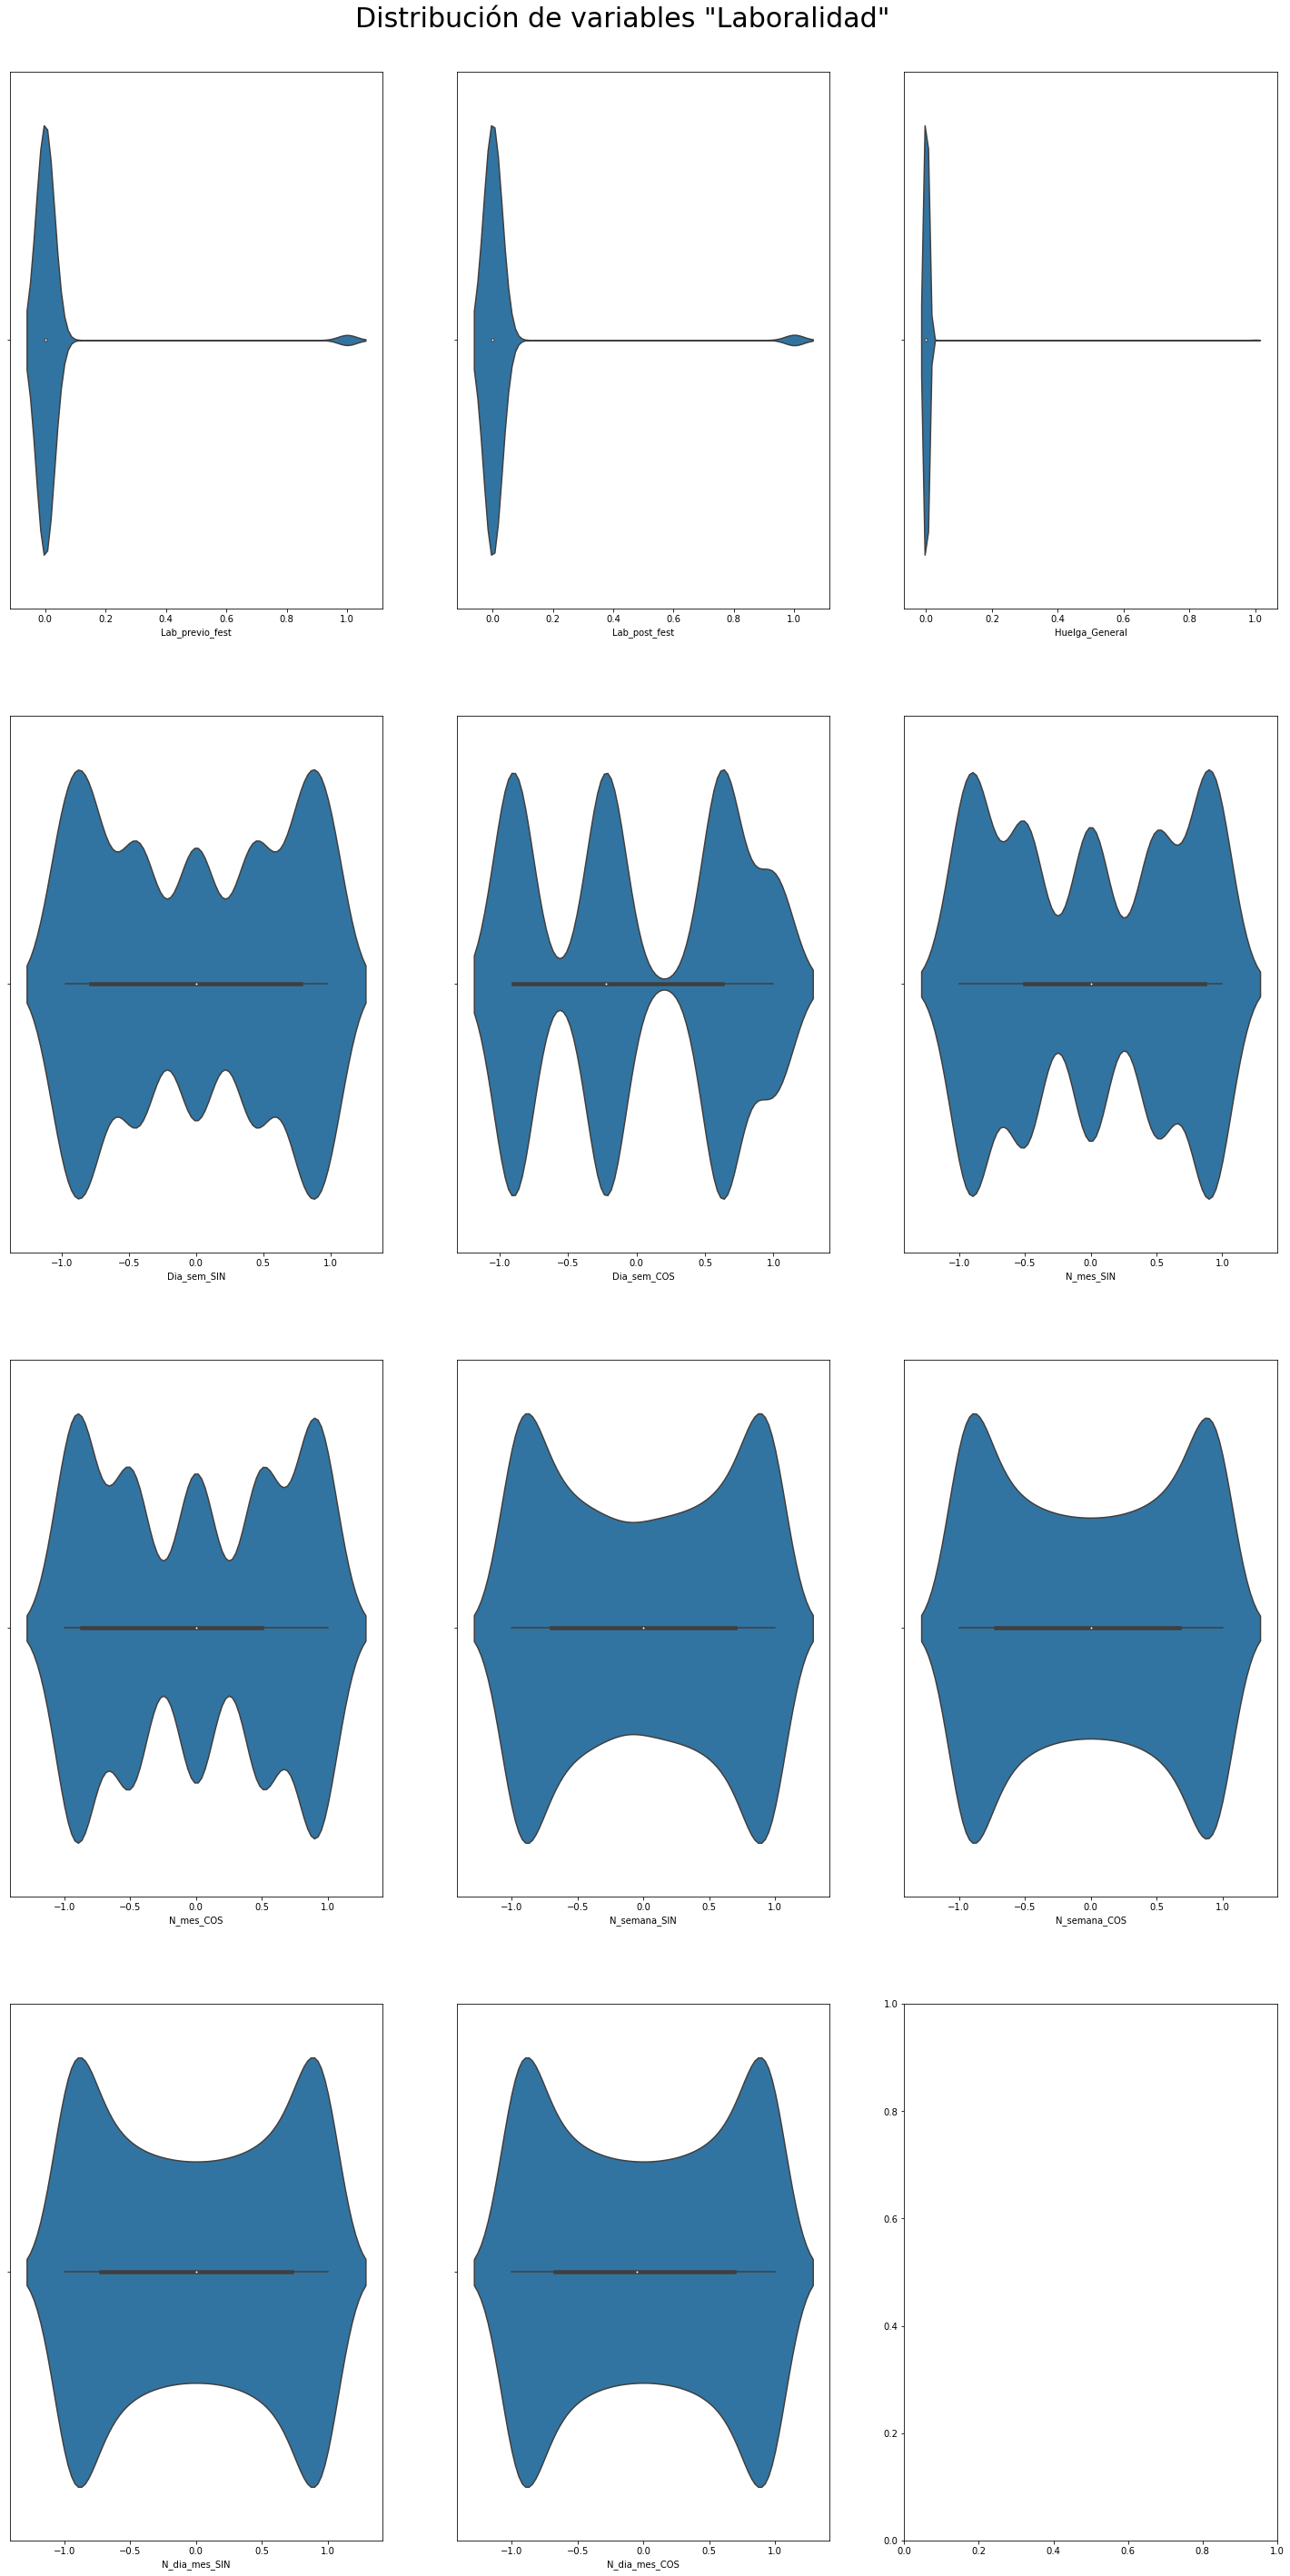

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

figure, axes = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(25,50))
figure.suptitle('Distribución de variables "Laboralidad"', y=0.90, fontsize=30)
ncol = 0
nrow = 0

for col in data1_cols:
    if ncol > 2:
        ncol = 0
        nrow += 1

    sns.violinplot(ax=axes[nrow, ncol], x=Data_profile1[col], kind="violin")
    ncol += 1
    
plt.show()

In [171]:
# DATOS "CLIMATOLÓGICOS"

vars_profile2 = ['DemReal', 'A3_Tmax', 'A3_Tmin', 'A4_Tmax', 'A4_Tmin', 'B3_Tmax', 'B3_Tmin', 'B4_Tmax', 'B4_Tmin', 'C1_Tmax', 'C1_Tmin', 
                'C2_Tmax', 'C2_Tmin', 'C3_Tmax','C3_Tmin', 'C4_Tmax', 'C4_Tmin', 'D1_Tmax', 'D1_Tmin', 'D2_Tmax', 'D2_Tmin', 
                'D3_Tmax', 'D3_Tmin', 'E1_Tmax', 'E1_Tmin']

Data_profile2 = DataEncSel_df[vars_profile2]

In [172]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(Data_profile2, title='Data_profile2_TFM', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../Data_out/Análisis datos/Data_profile2_TFM.html')

C:\MEDS\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [299]:
data2_cols = list(Data_profile2.columns)
data2_cols.remove('DemReal')
len(data2_cols)

24

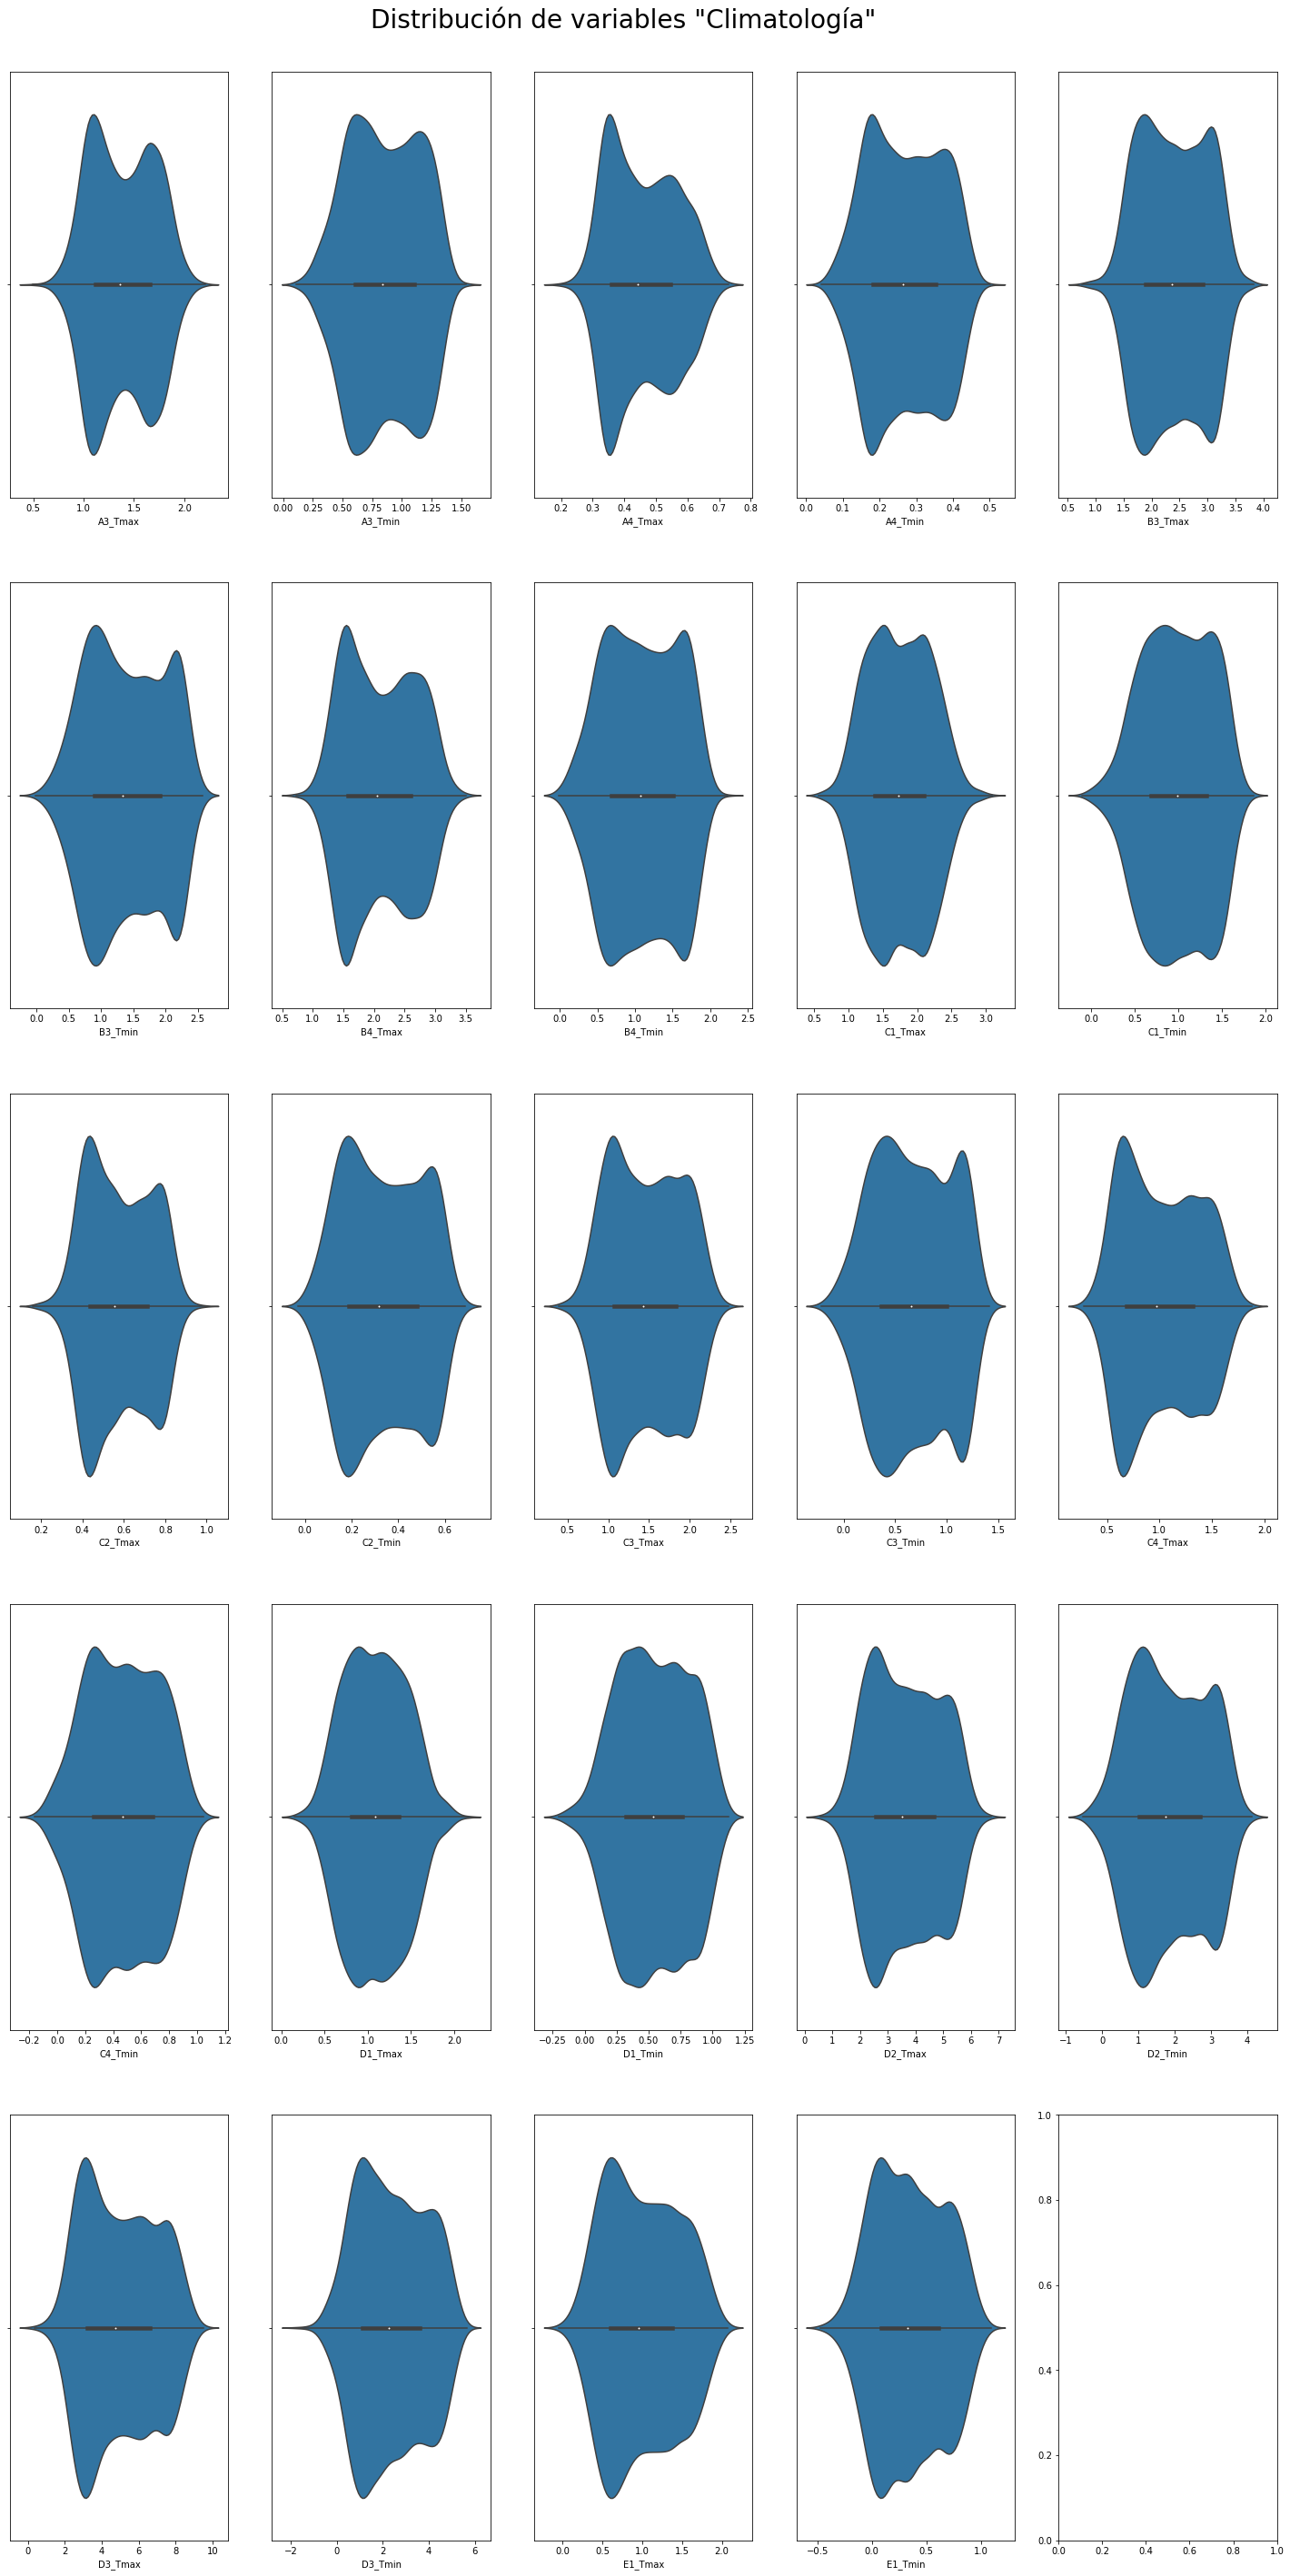

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

figure, axes = plt.subplots(5, 5, sharex=False, sharey=False, figsize=(25,50))
figure.suptitle('Distribución de variables "Climatología"', y=0.90, fontsize=28)
ncol = 0
nrow = 0

for col in data2_cols:
    if ncol > 4:
        ncol = 0
        nrow += 1

    sns.violinplot(ax=axes[nrow, ncol], x=Data_profile2[col], kind="violin")
    ncol += 1
    
plt.show()

In [173]:
# DATOS "ACTIVIDAD ECONÓMICA"

vars_profile3 = ['DemReal', 'Ind_Indust4', 'Ind_Indust5', 'Ind_Indust8', 'Ind_Indust9', 'Ind_Indust11', 'Ind_Indust12', 'Ind_Indust13', 
                 'Ind_Indust14', 'Ind_Indust15', 'Ind_Indust16', 'Ind_Indust17', 'Ind_Indust19', 'Ind_Indust21', 'Ind_Indust22', 
                 'Ind_Indust23', 'Ind_Indust24', 'Ind_Indust25', 'Ind_Indust26', 'Ind_Indust27', 'Ind_Indust30', 'Ind_Indust35', 
                 'Ind_Indust37', 'Ind_Indust40', 'Ind_Indust41', 'Ind_Indust53', 'Ind_Indust56', 'Ind_Serv3', 'Ind_Serv8', 
                 'Ind_Serv10', 'Ind_Empleo2', 'Ind_Empleo3', 'Ind_Cemento', 'Ind_Precios4', 'Ind_Fabr1', 'Ind_Fabr2']

Data_profile3 = DataEncSel_df[vars_profile3]

In [184]:
Data_profile3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DemReal       2922 non-null   float64
 1   Ind_Indust4   2922 non-null   float64
 2   Ind_Indust5   2922 non-null   float64
 3   Ind_Indust8   2922 non-null   float64
 4   Ind_Indust9   2922 non-null   float64
 5   Ind_Indust11  2922 non-null   float64
 6   Ind_Indust12  2922 non-null   float64
 7   Ind_Indust13  2922 non-null   float64
 8   Ind_Indust14  2922 non-null   float64
 9   Ind_Indust15  2922 non-null   float64
 10  Ind_Indust16  2922 non-null   float64
 11  Ind_Indust17  2922 non-null   float64
 12  Ind_Indust19  2922 non-null   float64
 13  Ind_Indust21  2922 non-null   float64
 14  Ind_Indust22  2922 non-null   float64
 15  Ind_Indust23  2922 non-null   float64
 16  Ind_Indust24  2922 non-null   float64
 17  Ind_Indust25  2922 non-null   float64
 18  Ind_Indust26  2922 non-null 

In [174]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(Data_profile3, title='Data_profile3_TFM', explorative=True)
# profile.to_notebook_iframe()
profile.to_file('../Data_out/Análisis datos/Data_profile3_TFM.html')

C:\MEDS\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [304]:
data3_cols = list(Data_profile3.columns)
data3_cols.remove('DemReal')
len(data3_cols)

35

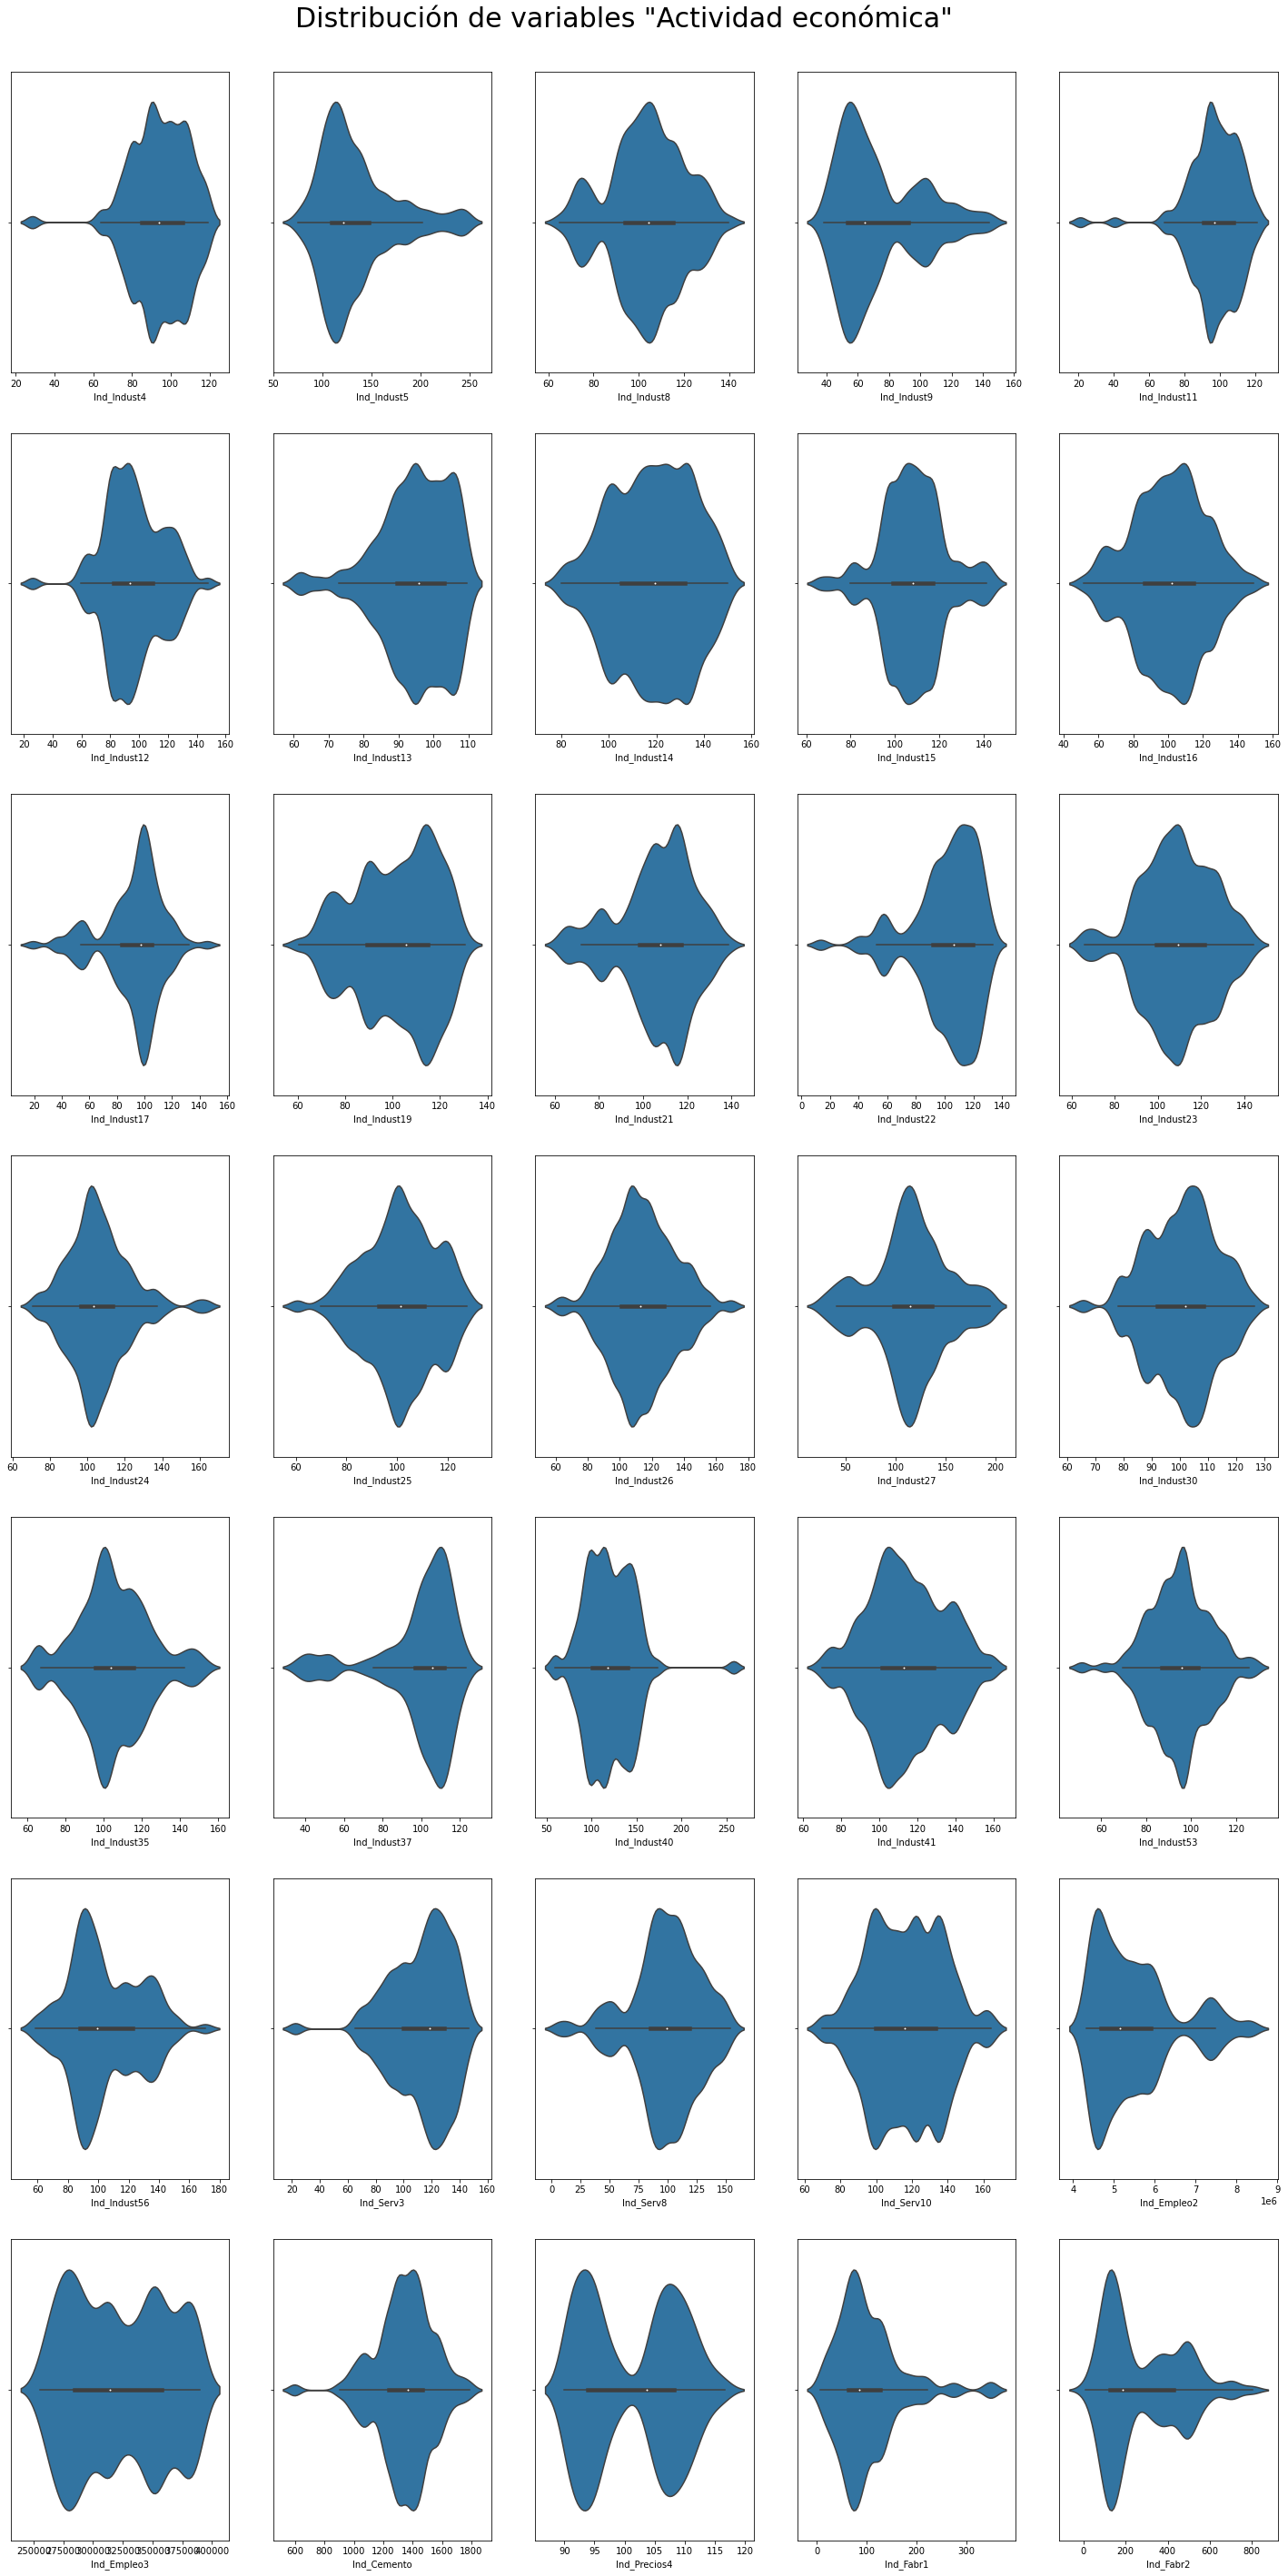

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

figure, axes = plt.subplots(7, 5, sharex=False, sharey=False, figsize=(25,50))
figure.suptitle('Distribución de variables "Actividad económica"', y=0.90, fontsize=30)
ncol = 0
nrow = 0

for col in data3_cols:
    if ncol > 4:
        ncol = 0
        nrow += 1

    sns.violinplot(ax=axes[nrow, ncol], x=Data_profile3[col], kind="violin")
    ncol += 1
    
plt.show()

A partir del pandas profiling podemos sacar algunas conclusiones sobre los datos:
* <b>Análisis univariante de variables predictoras</b>: No se tienen missing values en las variables predictoras.
* <b>Análisis de variable target (X24)</b>: Se observa que el porcentaje de default es del 22.1%. Por tanto se trata de un problema desbalanceado.
* <b>Análisis multivariante (relaciones 2 a 2) de variables predictoras</b>: existen altas correlaciones (Pearson) entre algunos grupos de variables:
    * Correlaciones entre los recibos (X12-X17). Correlaciones muy altas entre las variables del grupo de importe de recibos. Cabe destacar que la correlación decrece a medida que los meses son más distantes. La menor correlación se da entre los meses de septiembre y abril.
    * Correlaciones positivas entre los aplazamiento de pagos (X6-X11). Correlaciones muy altas entre las variables del grupo de aplazamiento de pagos. Cabe destacar que la correlación decrece a medida que los meses son más distantes. La menor correlación se da entre los meses de septiembre y abril.
    * Correlaciones entre los pagos(X18-X23). No hay correlaciones destcables.
    * Correlación negativa entre el límite de crédito (X1) y los meses de aplazamientos de pago: a mayor límite de crédito menos meses de solicitud de aplazamiento. Tiene sentido porque es de preveer que la entidad bancaria conceda límites mayores a aquellos clientes que tenga un mejor perfil de pago.
* <b>Análisis de relación entre cada variable predictora y el target</b>: para las variables continuas lo podemos ver con la correlación de Pearson, para variables categóricas elaboraremos nuestro propio código (aunque en pandas profiling se puede configurar este análisis con el campo <code>interactions.targets</code>, la representación no es especialmente adecuada si lo que se quiere ver es la propensión a impago dado el valor de la variable predictora). El código de la siguiente celda sirve para analizar la relación entre el target y las diferentes variables categóricas.
    * <b>Educación (categórica)</b>: Se observa que a mayor nivel educativo, menor probabilidad de impago.
    * <b>Edad</b>: No se observa correlación significativa.
    * <b>Credit amount</b>: se observa una ligera correlación negativa. Esto tiene sentido porque es de esperar que la entidad bancaria conceda mayor límite a los clientes que se espera sean mejores pagadores.
    * <b>Aplazamiento de pagos(X6-X11)</b>: Se observa correlación positiva: si se aplazan significativamente los pagos es más probable el impago en el mes siguiente.

In [ ]:
Hola, que tal

# - Revisión correlación vars. final

In [ ]:
DemRealComplMes_df_T = DemRealComplMes_df[DemRealComplMes_df['Fecha']>='2021-01-01']

In [ ]:
# Cross Correlation dataframe

CC3_df = pd.merge(DemRealComplMes_df_T, CompInd_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
CC3_df = pd.merge(CC3_df, CompServ_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)

In [ ]:
CC3_df = CC3_df.sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
CC3_df.head(5)

In [ ]:
CC3_df.tail(35)

In [ ]:
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# MODELO 2: Pred. "test" (Using Seaborn)

plt.figure(figsize=(20,6))
#sns.lineplot(x='Fecha',y='New_01',data=CC3_df[['Fecha','New_01']])
#sns.lineplot(x='Fecha',y='New_02',data=CC3_df[['Fecha','New_02']])
#sns.lineplot(x='Fecha',y='New_03',data=CC3_df[['Fecha','New_03']])
#sns.lineplot(x='Fecha',y='New_04',data=CC3_df[['Fecha','New_04']])
#sns.lineplot(x='Fecha',y='New_05',data=CC3_df[['Fecha','New_05']])
sns.lineplot(x='Fecha',y='New_06',data=CC3_df[['Fecha','New_06']])
plt.show()

### 1.5. Índices macroeconómicos

In [ ]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in5 = '../Data_in/6_Indices_Macro/Indices_Macro.xlsx'

IndMacro_df = pd.read_excel(data_in5, header='infer')

In [ ]:
IndMacro_df

#### - Comprobamos correlaciones cruzadas

In [ ]:
drop_list = ['Cod_fecha']
IndMacro_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [ ]:
DemRealComplMes_df_T = DemRealComplMes_df[(DemRealComplMes_df['Fecha']>='2014-01-01') & (DemRealComplMes_df['Fecha']<='2021-12-31')]
DemRealComplMes_df_T

In [ ]:
# Cross Correlation dataframe

CC3_df = pd.merge(DemRealComplMes_df_T, IndMacro_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)

In [ ]:
CC3_df = CC3_df.sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
CC3_df.tail(15)

In [ ]:
def corr_vars(df_input, col_ppal, cols_drop):
    
    df_vars = df_input.drop(axis=1, columns=col_ppal, level=None, inplace=False, errors='raise')
    df_vars = df_vars.drop(axis=1, columns=cols_drop, level=None, inplace=False, errors='raise')
    #df_vars_cols = list(df_vars.columns)
    #df_vars = df_vars[df_vars_cols].astype("float64")
    
    df_out = pd.DataFrame(columns=['Vars','Desf_Max_Corrs','Corr_max', 'Corr_0', 'Corr_1'])
    cols_names = list(df_vars.columns)
    DemReal = df_input[col_ppal]
    i=0
    
    for x in cols_names:
        i+=1
        var_check = df_vars[x]
        
        a = sm.tsa.stattools.ccf(DemReal, var_check, adjusted=False)
        a_altos = np.where(a >= max(a.min(), a.max(), key=abs)*0.5)
        a_max = a[np.where(a == max(a.min(), a.max(), key=abs))][0]
        
        #print('#####',x,'-',i,'######')
        #print(a_altos)
        #print(a_max)
                           
        a_altos = a_altos[0].tolist()
        #print(a_altos)
        
        df_out.at[i-1,'Vars'] = x
        df_out.at[i-1,'Desf_Max_Corrs'] = a_altos
        df_out.at[i-1,'Corr_max'] = a_max
        df_out.at[i-1,'Corr_0'] = a[0]
        df_out.at[i-1,'Corr_1'] = a[1]
        df_out.at[i-1,'Corr_2'] = a[2]
        df_out.at[i-1,'Corr_3'] = a[3]
        df_out.at[i-1,'Corr_4'] = a[4]
        df_out.at[i-1,'Corr_5'] = a[5]
        df_out.at[i-1,'Corr_6'] = a[6]
        df_out.at[i-1,'Corr_29'] = a[29]
        df_out.at[i-1,'Corr_30'] = a[30]
        df_out.at[i-1,'Corr_31'] = a[31]
        
    return df_out


In [ ]:
df_corr = corr_vars(df_input=CC3_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])

In [ ]:
df_corr

In [ ]:
CC3_df.corr()

In [ ]:
cols_drop = ['Fecha', 'DemReal']

In [ ]:
CC3_df.drop(axis=1, columns=cols_drop, level=None, inplace=True, errors='raise')

In [ ]:
CC3_df

In [ ]:
CC3_df

In [ ]:
CompMacroDesf1_df = desf_var(df_input=CC3_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompMacroDesf1_df.head(20)

### 1.6. Imputación "missing values" variables Industrial y Servicios

In [ ]:
# Cross Correlation dataframe

CC2_df = pd.merge(DemRealComplMes_df, CompIndDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
CC2_df = pd.merge(CC2_df, CompIndDesf0_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)
CC2_df = pd.merge(CC2_df, CompServDesf1_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)

In [ ]:
CC2_df.drop(axis=1, columns='Fecha', level=None, inplace=True, errors='raise')

In [ ]:
CC2_df.head(5)

In [ ]:
CC2mes_df = CC2_df['N_mes'].copy()

In [ ]:
CC2_df = CC2_df.replace(0, np.nan)
CC2_df

In [ ]:
CC2_df.isnull().sum()

#### - Codificamos las variables categóricas cíclicas 'N_dia_mes' (Day) y 'N_mes'

Codificamos las variables categóricas cíclicas expresándolas mediante los valores del coseno y el seno de la división de una circunferencia por el número de categorías de la variable.

The CyclicalTransformer() works only with numerical variables. A list of variables to transform can be passed as an argument. Alternatively, the transformer will automatically select and transform all numerical variables. Missing data should be imputed before applying this transformer.

var_sin = sin(variable * (2. * pi / max_value))

var_cos = cos(variable * (2. * pi / max_value))

In [ ]:
def cicl_tranf_month(df_input, col_month):
    
    nrows = df_input.shape[0]
    df_out = df_input.copy()
    df_out["N_mes_SIN"] = ""
    df_out["N_mes_COS"] = ""
    
    for i in range(0,nrows):
        month_i = df_input[col_month][i]

        df_out.at[i, 'N_mes_SIN'] = np.sin((month_i-1)*(2.*np.pi/12))
        df_out.at[i, 'N_mes_COS'] = np.cos((month_i-1)*(2.*np.pi/12))
            
    df_out = df_out.astype({'N_mes_SIN':'float64', 'N_mes_COS':'float64'})

    return df_out

In [ ]:
CC2_df = cicl_tranf_month(df_input=CC2_df, col_month='N_mes')

In [ ]:
CC2_df.drop(axis=1, columns='N_mes', level=None, inplace=True, errors='raise')

In [ ]:
CC2_df

#### - Escalamos las variables

Escalamos todas las variables preparadas.

Escalado de variables binarias: puede tener sentido de cara a la aplicación de modelos, no tiene sentido si lo que queremos es mantener la interpretabilidad.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(CC2_df)

In [ ]:
CC2_df_COLS = list(CC2_df.columns)
CC2_df_COLS

In [ ]:
CC2_df_ESC = pd.DataFrame(scaler.transform(CC2_df), columns=CC2_df_COLS)
CC2_df_ESC

#### - Imputación valores dataset "train" (MICE)

Aplicamos el algoritmo MICE de imputación (tiempo aproximado de procesamiento:  mins).

In [ ]:
# Create kernel. 
kds = mf.ImputationKernel(CC2_df_ESC, save_all_iterations=True, random_state=314)

In [ ]:
# Run the MICE algorithm for 3 iterations
kds.mice(5)

In [ ]:
# Printing the kernel will show you some high level information.
print(kds)

In [ ]:
# Return the completed kernel data (obtain our completed dataset directly from the kernel):
CC2_Compl_df_ESC = kds.complete_data(dataset=0, inplace=False)

In [ ]:
CC2_Compl_df_ESC.isnull().sum()

In [ ]:
CC2_Compl_df_ESC.describe()

In [ ]:
CC2_df_ESC.describe()

#### - Re-escalado de las variables

Deshacemos el "escalado" de las variables previo a la imputación de valores mediante el algortimo MICE.

In [ ]:
CC2_Compl_df = pd.DataFrame(scaler.inverse_transform(CC2_Compl_df_ESC), columns=CC2_df_COLS)
CC2_Compl_df['N_ano'] = CC2_Compl_df['N_ano'].astype(int)
CC2_Compl_df

In [ ]:
# Unimos los datos completos con las variables categóricas antes codificadas
CC2_Compl_df.drop(axis=1, columns=['DemReal','N_mes_SIN','N_mes_COS'], level=None, inplace=True, errors='raise')
CC2_Compl_df = CC2_Compl_df.join(CC2mes_df)
CC2_Compl_df

### 1.9999. Índices macroeconómicos

In [ ]:
# Var. explicativa "CompInd_df" (CARGA DATOS)

data_in5 = '../Data_in/6_Indices_Macro/Indices_Macro.xlsx'

IndMacro_df = pd.read_excel(data_in5, header='infer')

In [ ]:
IndMacro_df

#### - Comprobamos correlaciones cruzadas

In [ ]:
drop_list = ['Cod_fecha']
IndMacro_df.drop(axis=1, columns=drop_list, level=None, inplace=True, errors='raise')

In [ ]:
DemRealComplMes_df_T = DemRealComplMes_df[(DemRealComplMes_df['Fecha']>='2014-01-01') & (DemRealComplMes_df['Fecha']<='2021-12-31')]
DemRealComplMes_df_T

In [ ]:
# Cross Correlation dataframe

CC3_df = pd.merge(DemRealComplMes_df_T, IndMacro_df, how="inner", on=['N_mes','N_ano'], sort=False, suffixes=False)

In [ ]:
CC3_df = CC3_df.sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
CC3_df.tail(15)

In [ ]:
def corr_vars(df_input, col_ppal, cols_drop):
    
    df_vars = df_input.drop(axis=1, columns=col_ppal, level=None, inplace=False, errors='raise')
    df_vars = df_vars.drop(axis=1, columns=cols_drop, level=None, inplace=False, errors='raise')
    #df_vars_cols = list(df_vars.columns)
    #df_vars = df_vars[df_vars_cols].astype("float64")
    
    df_out = pd.DataFrame(columns=['Vars','Desf_Max_Corrs','Corr_max', 'Corr_0', 'Corr_1'])
    cols_names = list(df_vars.columns)
    DemReal = df_input[col_ppal]
    i=0
    
    for x in cols_names:
        i+=1
        var_check = df_vars[x]
        
        a = sm.tsa.stattools.ccf(DemReal, var_check, adjusted=False)
        a_altos = np.where(a >= max(a.min(), a.max(), key=abs)*0.5)
        a_max = a[np.where(a == max(a.min(), a.max(), key=abs))][0]
        
        #print('#####',x,'-',i,'######')
        #print(a_altos)
        #print(a_max)
                           
        a_altos = a_altos[0].tolist()
        #print(a_altos)
        
        df_out.at[i-1,'Vars'] = x
        df_out.at[i-1,'Desf_Max_Corrs'] = a_altos
        df_out.at[i-1,'Corr_max'] = a_max
        df_out.at[i-1,'Corr_0'] = a[0]
        df_out.at[i-1,'Corr_1'] = a[1]
        df_out.at[i-1,'Corr_2'] = a[2]
        df_out.at[i-1,'Corr_3'] = a[3]
        df_out.at[i-1,'Corr_4'] = a[4]
        df_out.at[i-1,'Corr_5'] = a[5]
        df_out.at[i-1,'Corr_6'] = a[6]
        df_out.at[i-1,'Corr_29'] = a[29]
        df_out.at[i-1,'Corr_30'] = a[30]
        df_out.at[i-1,'Corr_31'] = a[31]
        
    return df_out


In [ ]:
df_corr = corr_vars(df_input=CC3_df, col_ppal='DemReal', cols_drop=['Fecha','N_ano', 'N_mes'])

In [ ]:
df_corr

In [ ]:
CC3_df.corr()

In [ ]:
cols_drop = ['Fecha', 'DemReal']

In [ ]:
CC3_df.drop(axis=1, columns=cols_drop, level=None, inplace=True, errors='raise')

In [ ]:
CC3_df

In [ ]:
CC3_df

In [ ]:
CompMacroDesf1_df = desf_var(df_input=CC3_df, col_ano='N_ano', col_mes='N_mes', n_meses_desf=1)
CompMacroDesf1_df.head(20)